In [1]:
import numpy as np
import itertools
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
import matplotlib.cm as cm
from matplotlib import animation
from matplotlib import transforms
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr
import dask
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import netCDF4

from skimage.metrics import structural_similarity as ssim

import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [3]:
def plot_generator_paper(sample, X, Z):
    
    fz = 15*1.25
    lw = 4
    siz = 100
    XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
    XTEXT = 0.25 # Text placement
    YTEXT = 0.3 # Text placement
    
    plt.rc('text', usetex=False)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    #mpl.rcParams["font.serif"] = "STIX"
    plt.rc('font', family='serif', size=fz)
    matplotlib.rcParams['lines.linewidth'] = lw
    
    
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,1, figsize=(15,6))
    cs0 = ax.pcolor(X, Z, sample, cmap=cmap, vmin=-1.0, vmax = 1.0)
    ax.set_title("Anomalous Vertical Velocity Field Detected By ELBO")
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.set_xlabel("CRMs", fontsize=fz*1.5)
    ax.xaxis.set_label_coords(0.54,-0.05)
    h = ax.set_ylabel("hPa", fontsize = fz*1.5)
    h.set_rotation(0)
    ax.yaxis.set_label_coords(-0.10,0.44)
    #y_ticks = np.arange(1350, 0, -350)
    #ax.set_yticklabels(y_ticks, fontsize=fz*1.33)
    ax.tick_params(axis='x', labelsize=fz*1.33)
    ax.tick_params(axis='y', labelsize=fz*1.33)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)
    cbar.set_label(label=r'$\left(\mathrm{m\ s^{-1}}\right)$', rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.65)
    plt.show()
    #plt.savefig("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/CI_Figure_Data/Anomaly.pdf")
    
#plot_generator(test[0,:,:])

In [4]:
z_test_tsne = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/2D_PCA_Latent_Space__31.npy")
Synoptic_Amazon_W_Test_2D = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Synoptic_Latent_Spaces/Synoptic_Amazon_Point_2D_PCA_Latent_Space__31.npy")

Amazon_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/synoptic_amazon_point.npy")
Max_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Max_Scalar.npy")
Min_Scalar = np.load("/fast/gmooers/Preprocessed_Data/Centered_50_50/Space_Time_Min_Scalar.npy")
Amazon_Test_Images = np.interp(Amazon_Test_Images, (0, 1), (Min_Scalar, Max_Scalar))

In [5]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [6]:
print(Synoptic_Amazon_W_Test_2D.shape)
print(Amazon_Test_Images.shape)

(960, 2)
(960, 30, 128)


### Based on animations restrict data to day 4 to focus on that convection development 

In [7]:
Day_4_latent_space = Synoptic_Amazon_W_Test_2D[96*4:96*5,:] 
Day_4_Images = Amazon_Test_Images[96*4:96*5,:,:]

0


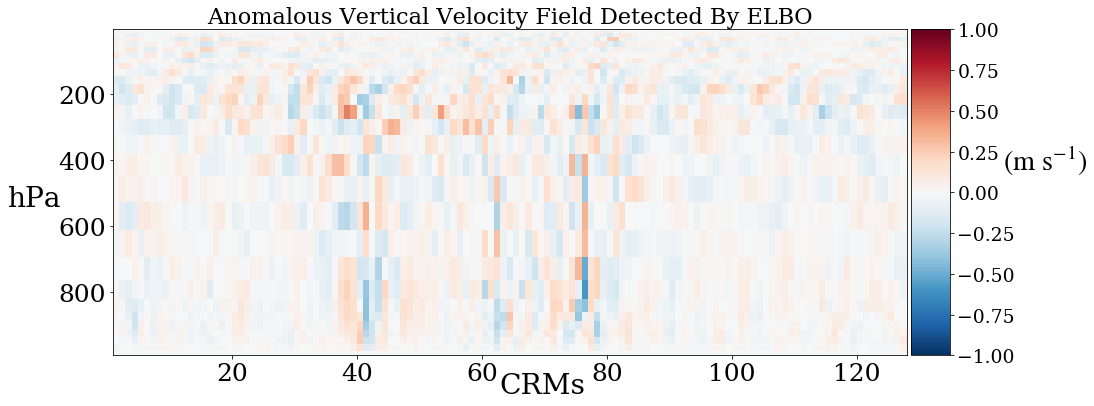

1


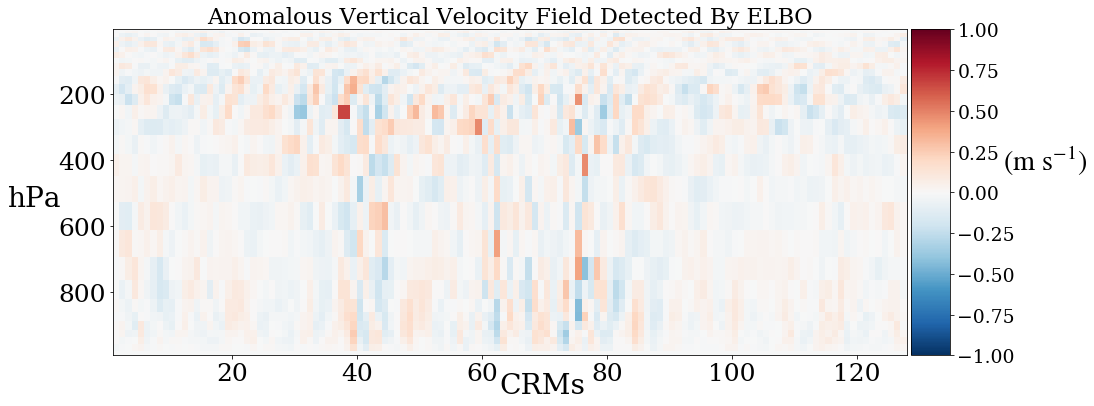

2


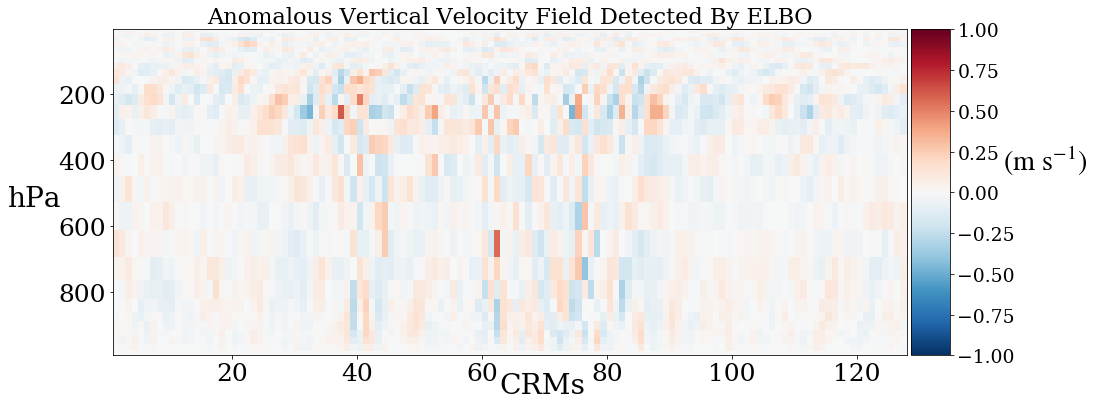

3


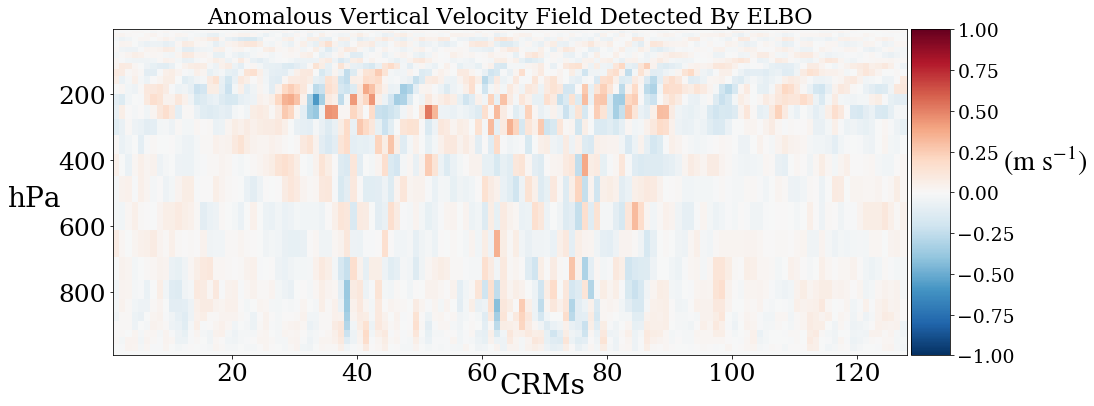

4


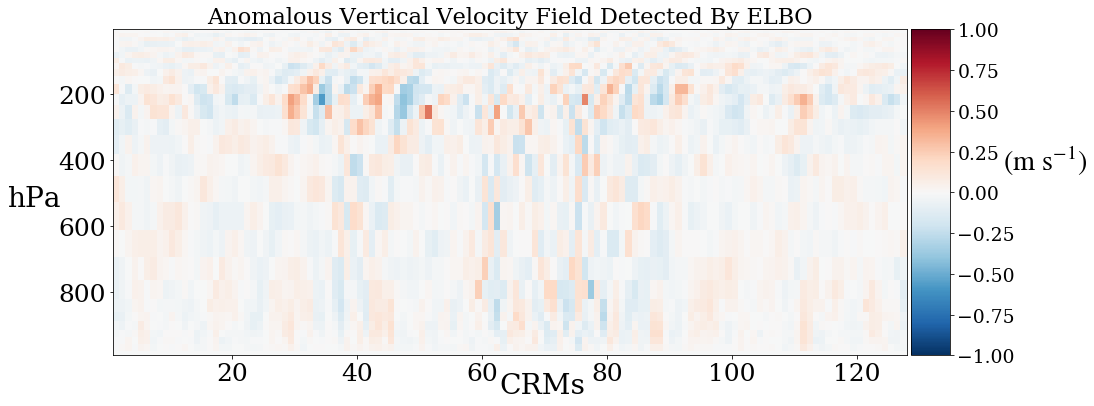

5


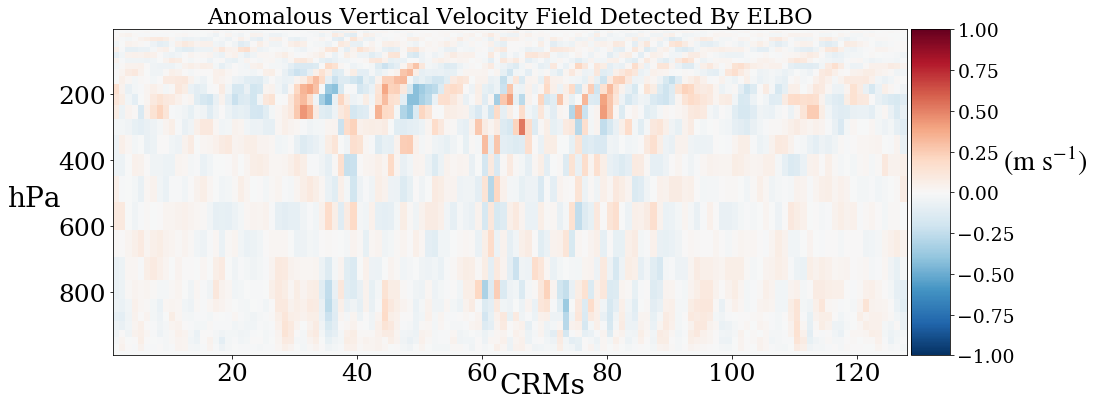

6


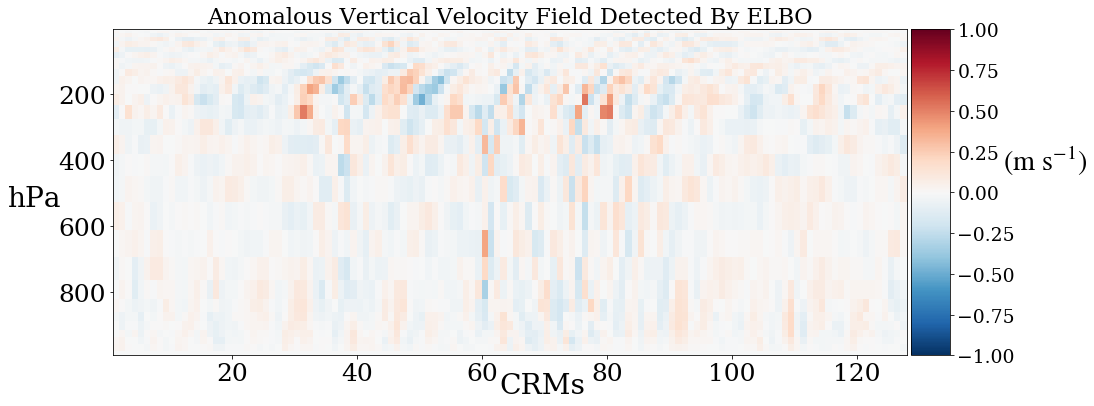

7


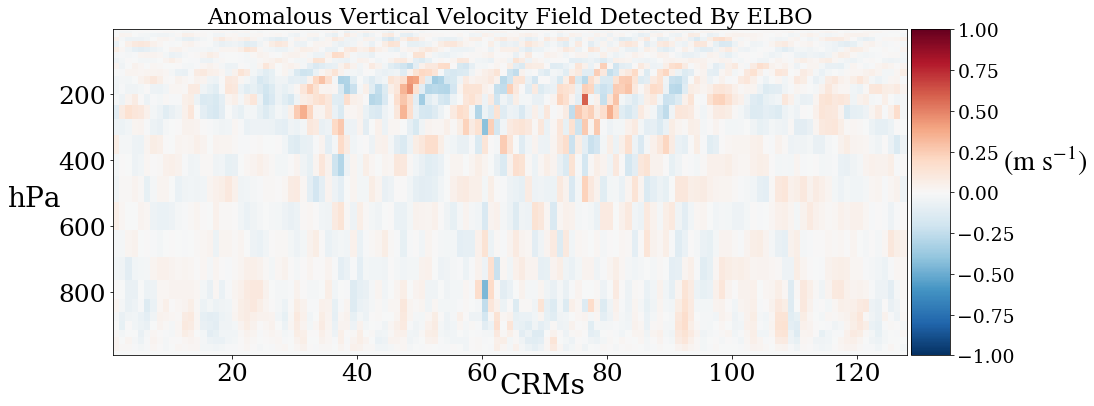

8


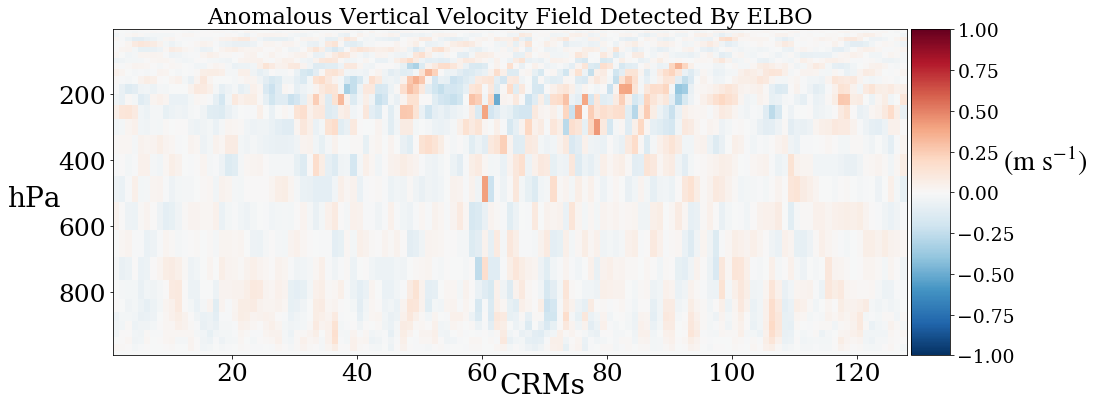

9


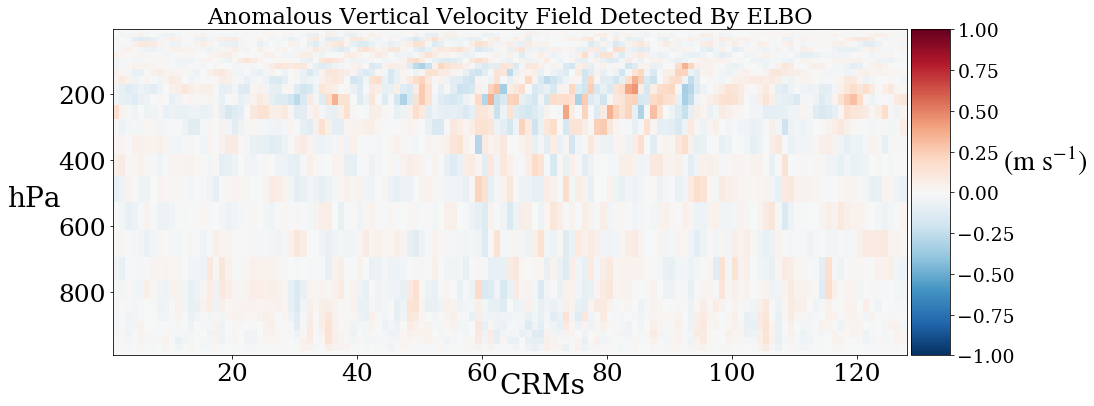

10


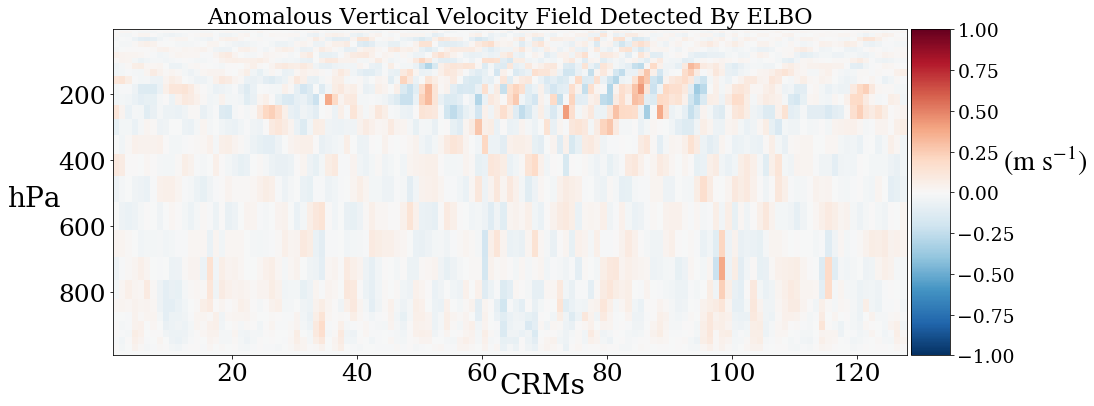

11


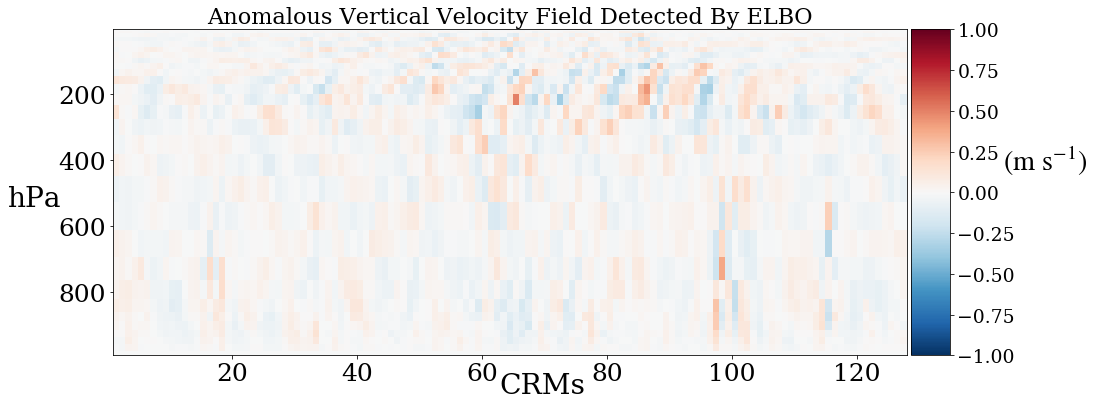

12


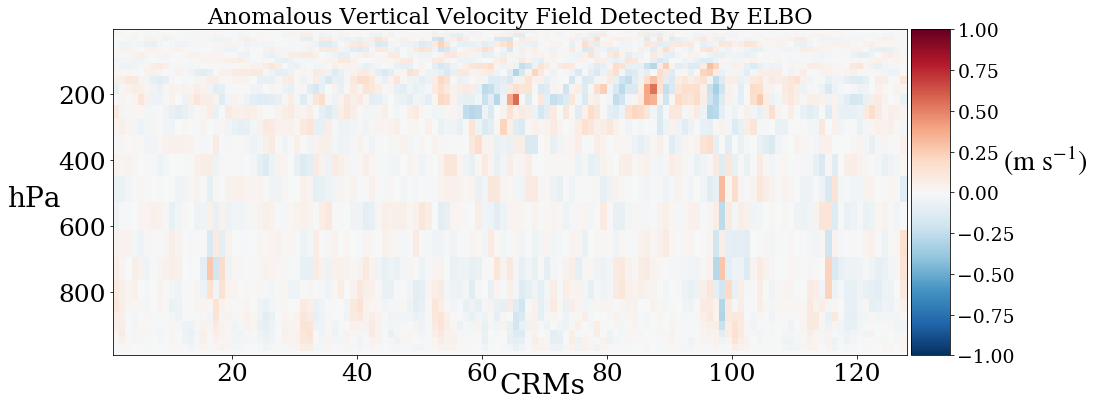

13


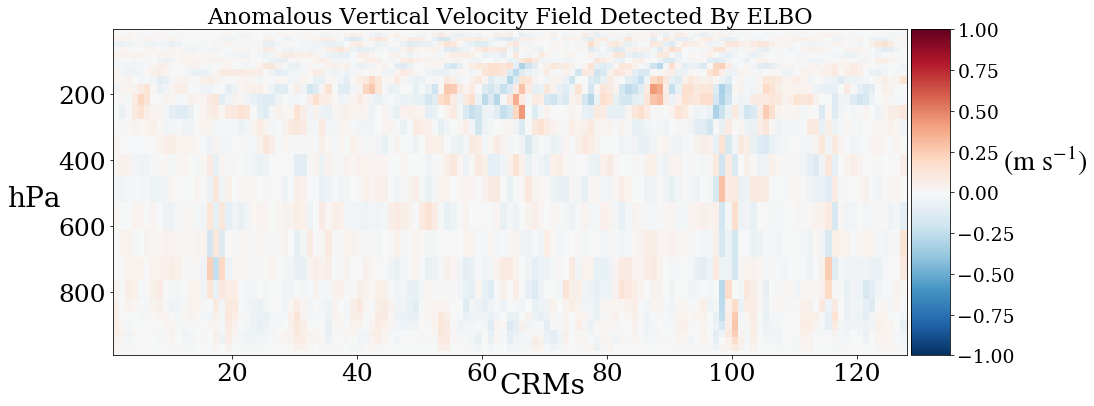

14


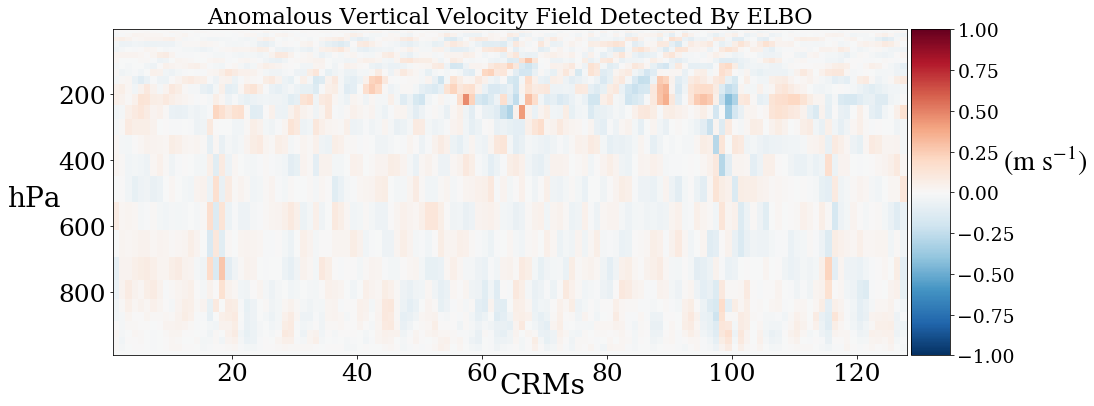

15


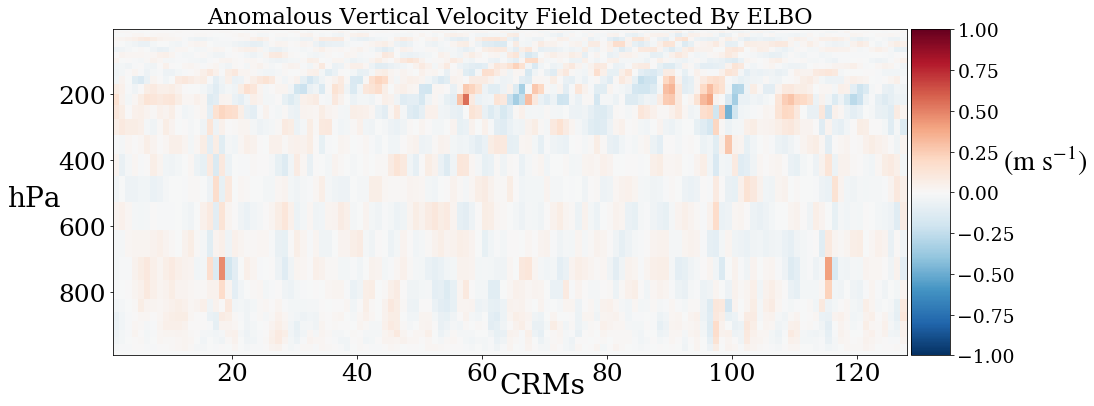

16


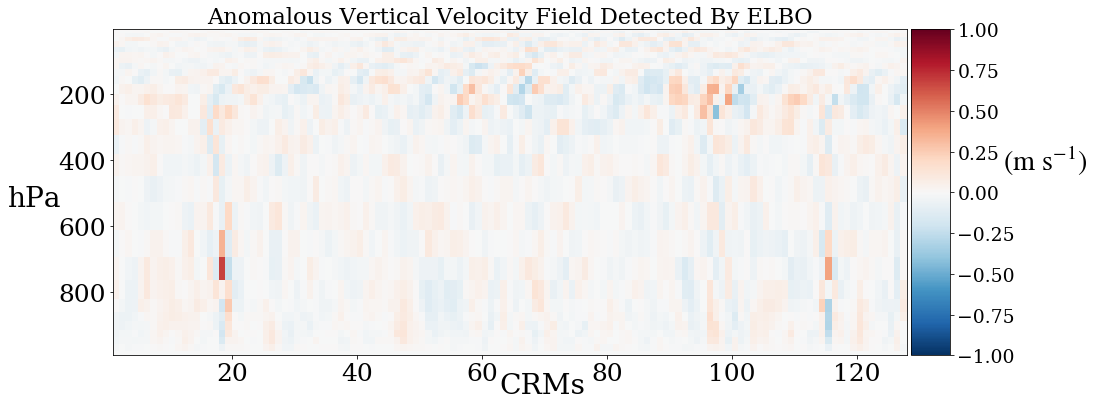

17


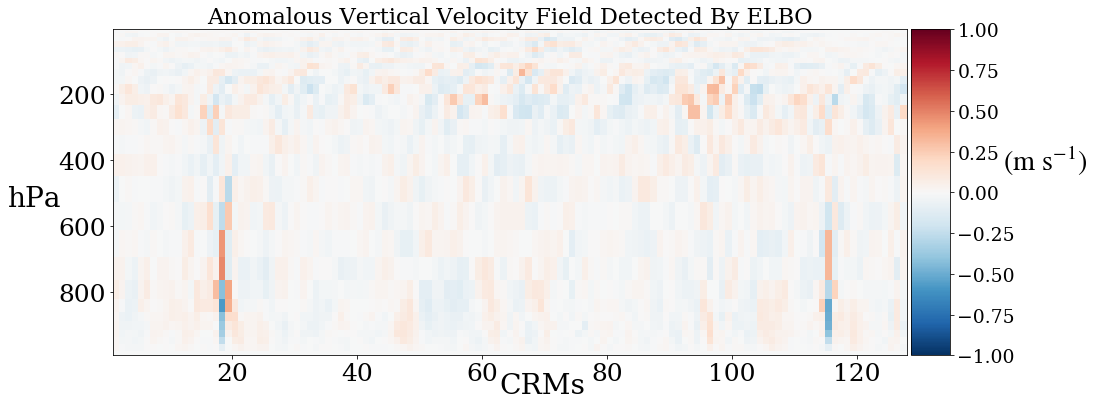

18


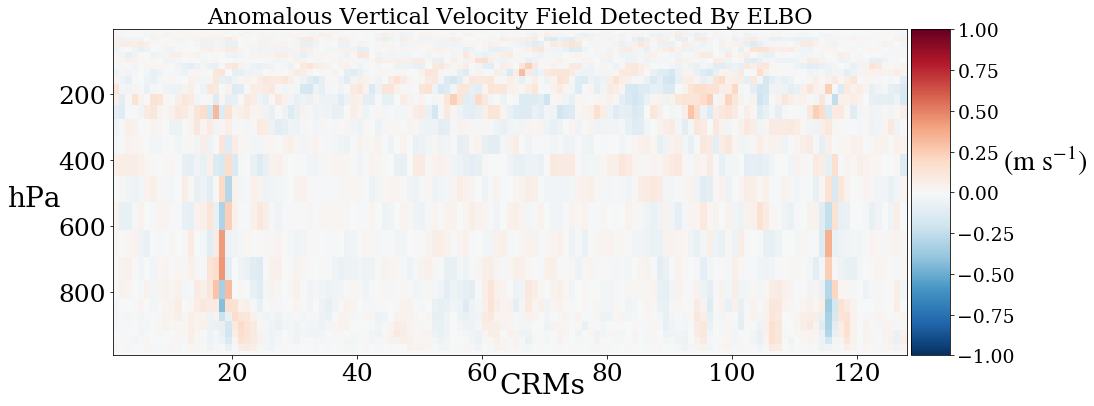

19


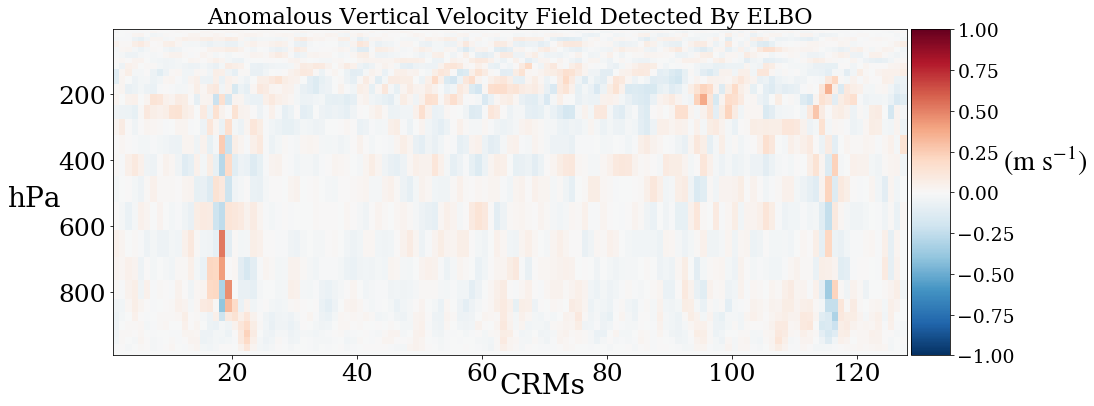

20


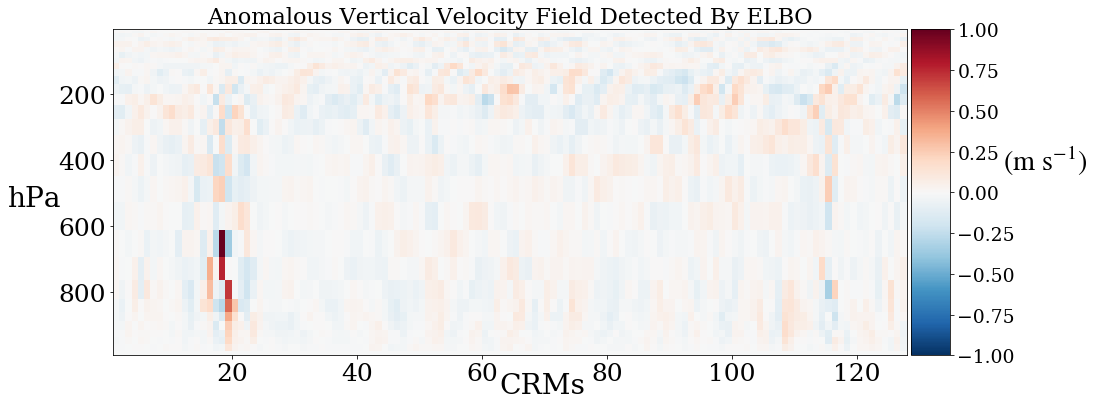

21


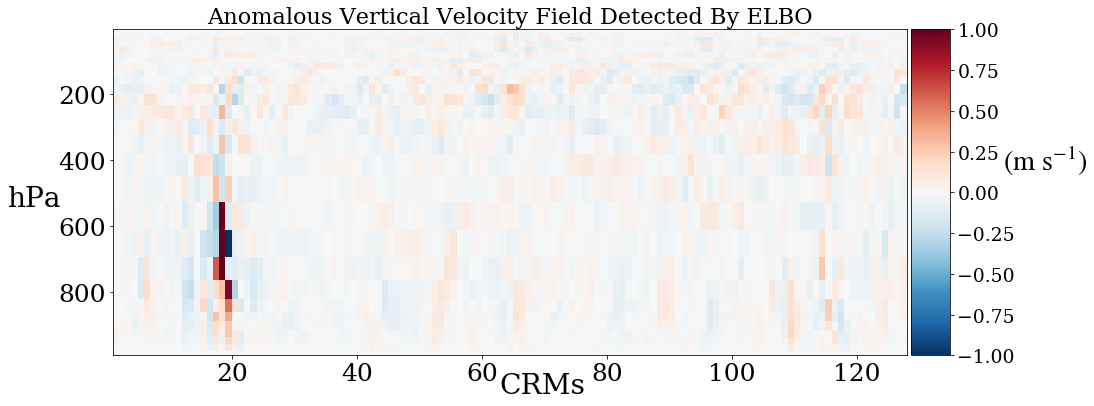

22


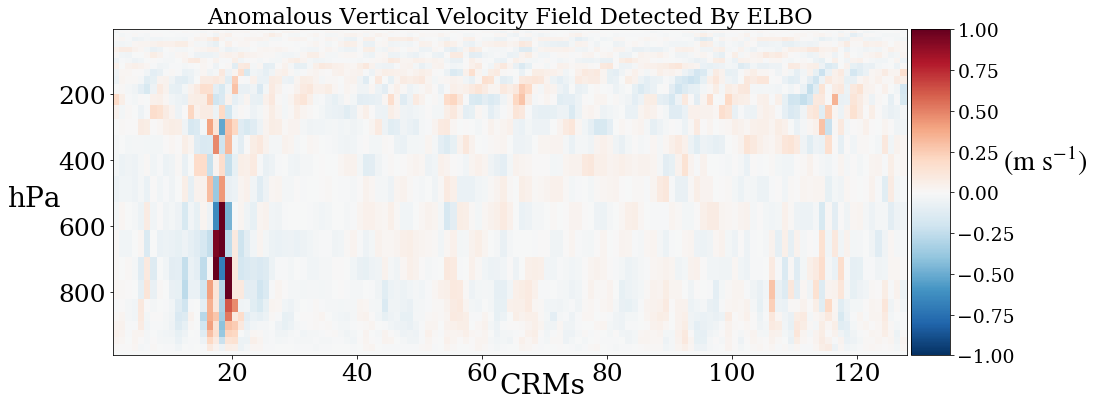

23


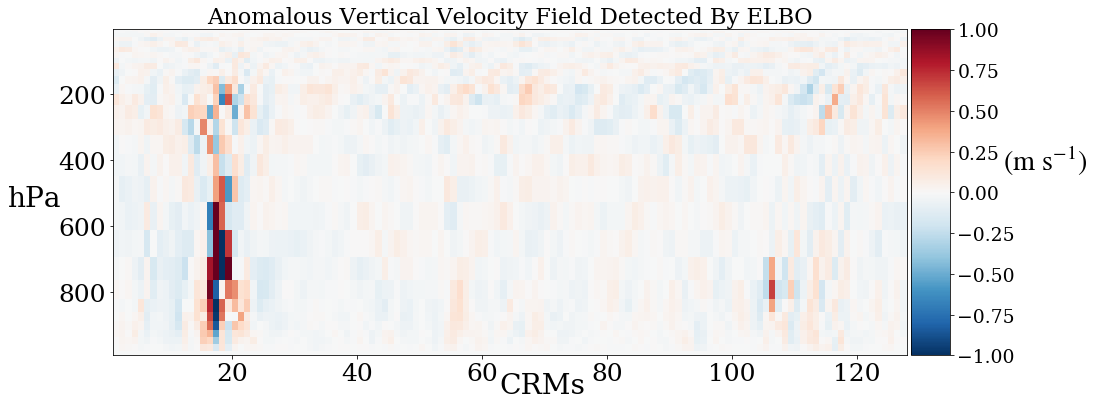

24


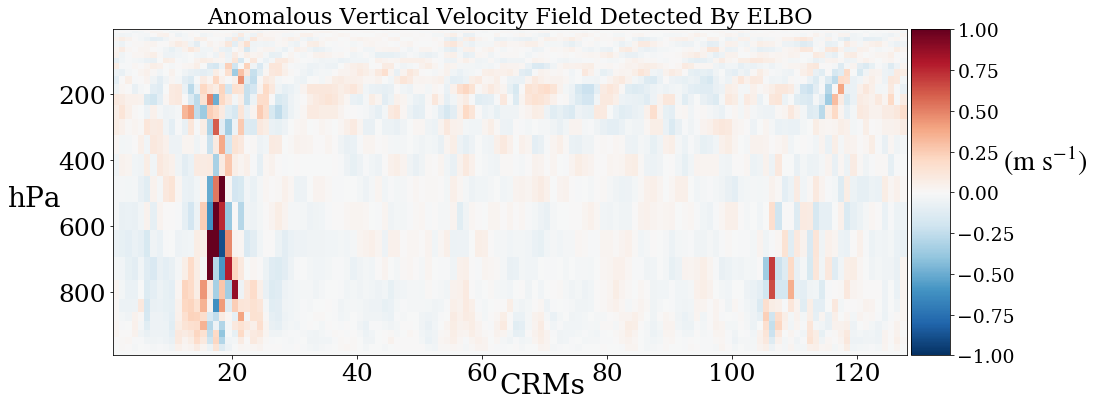

25


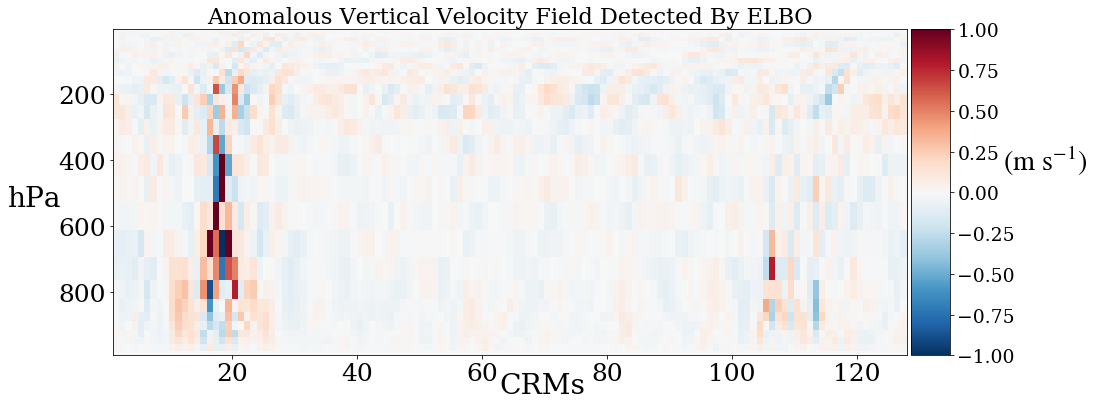

26


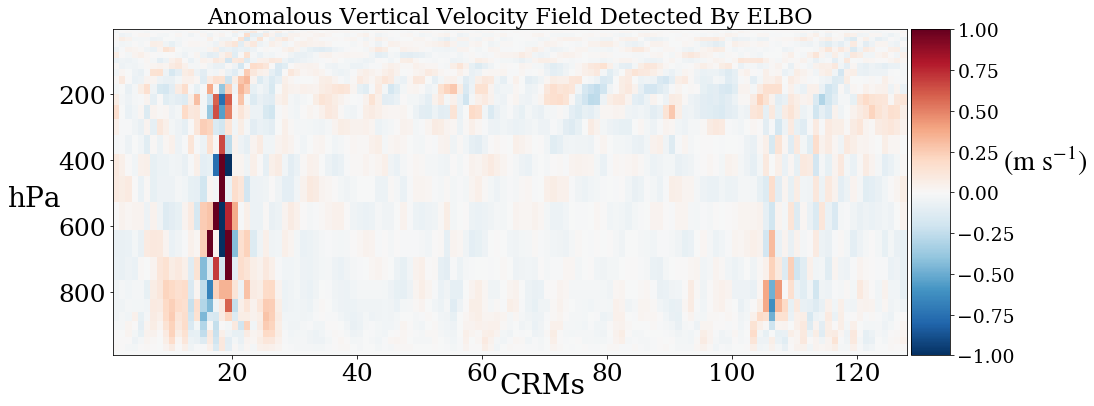

27


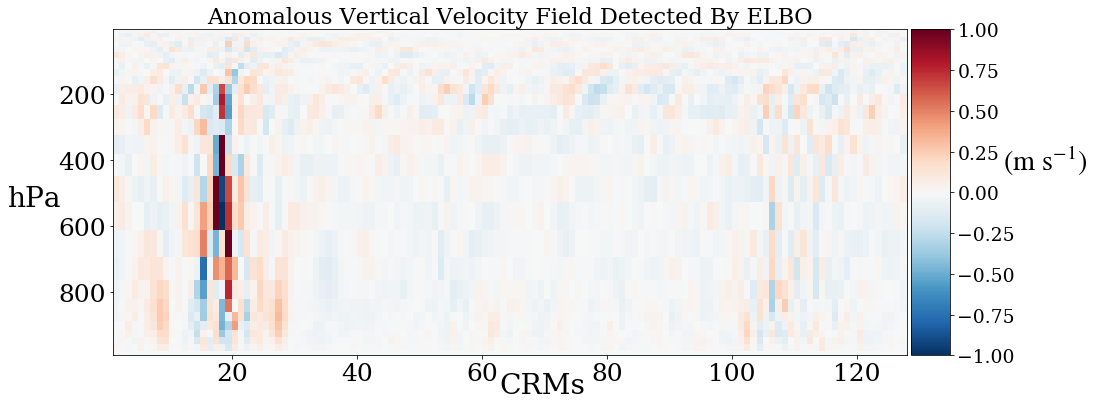

28


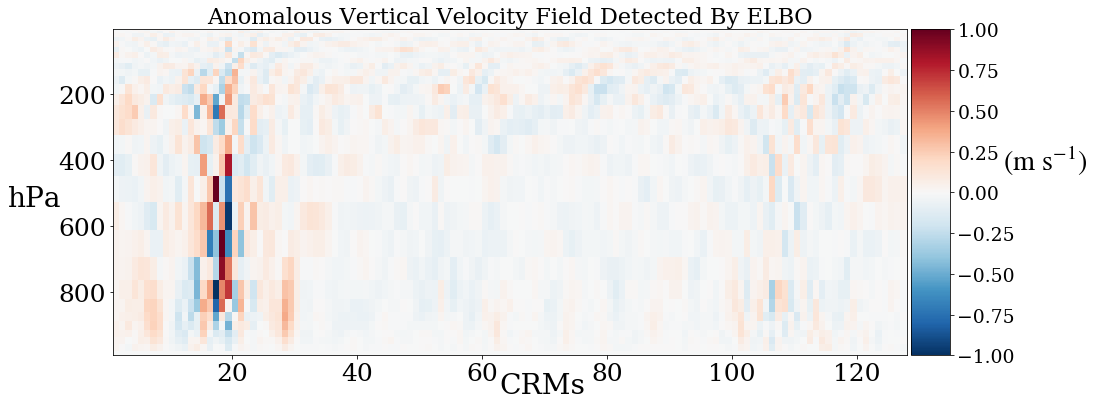

29


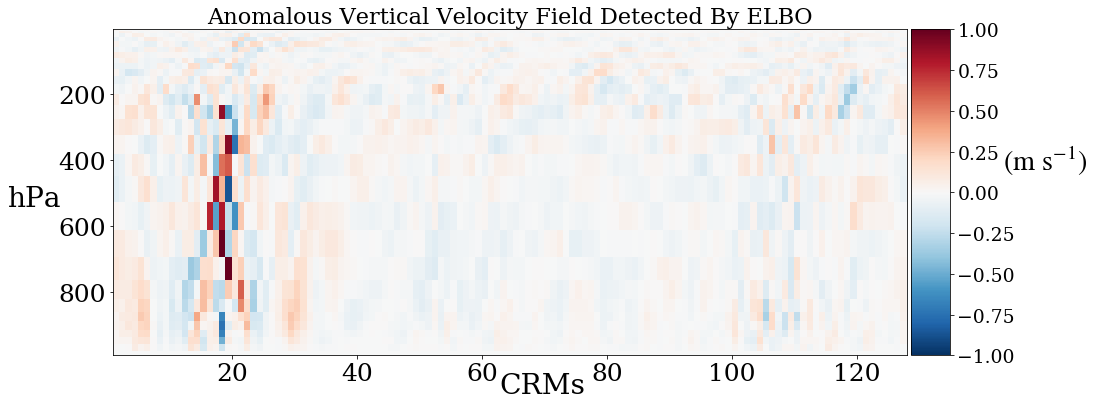

30


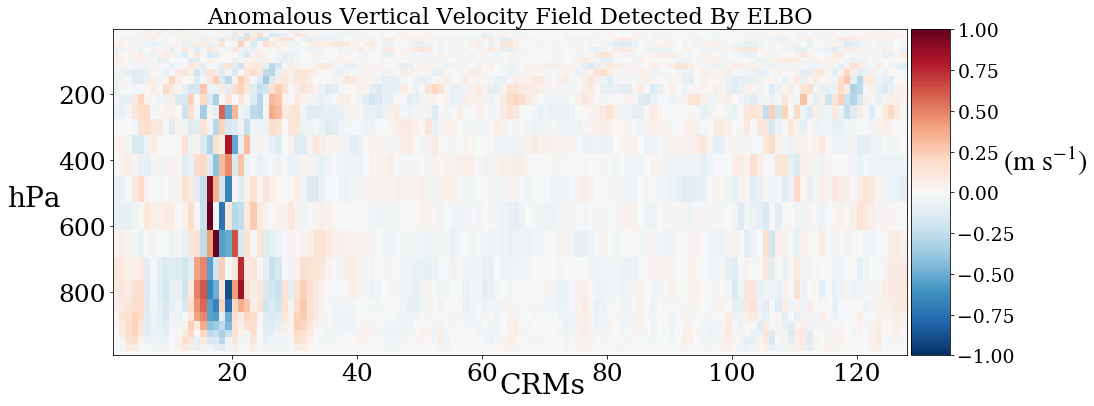

31


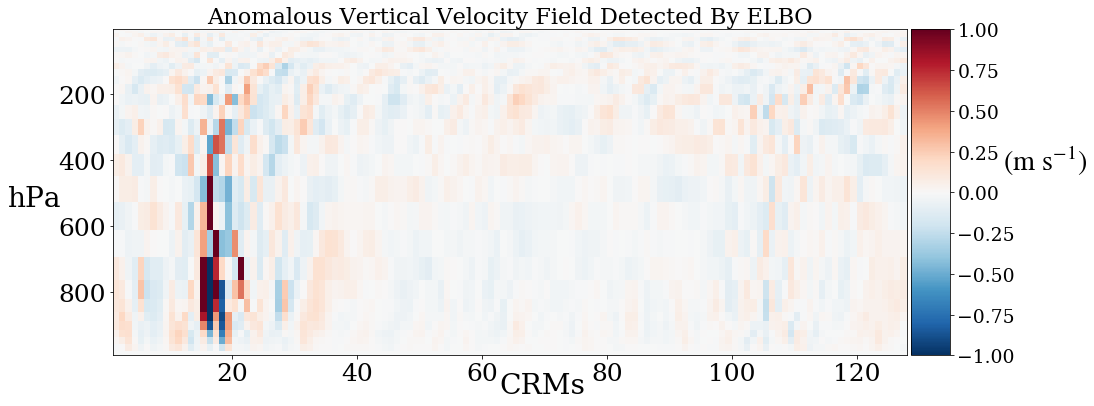

32


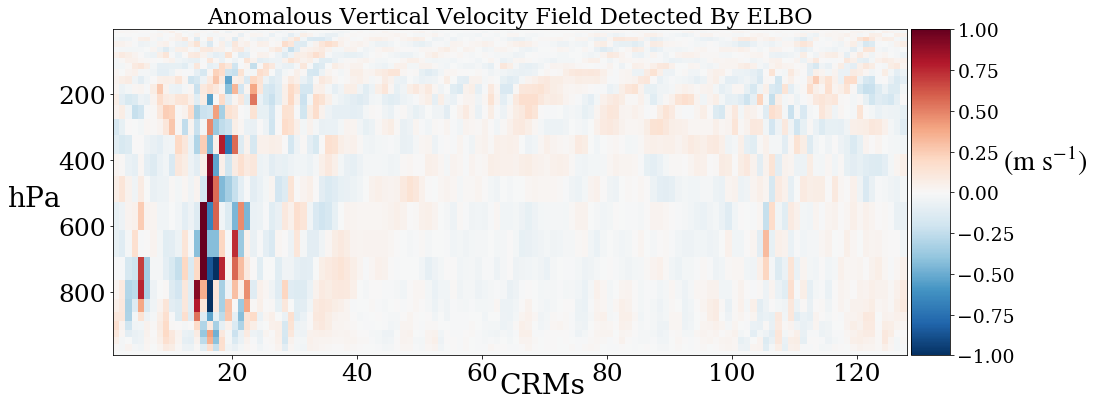

33


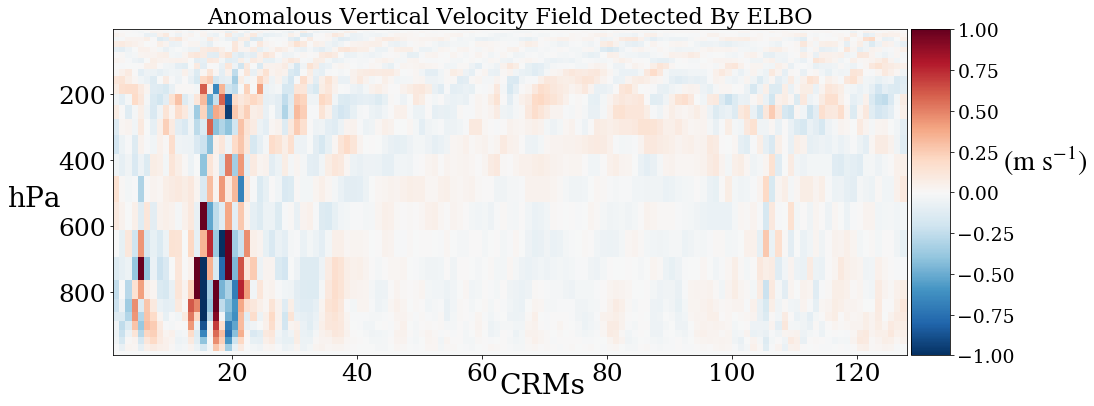

34


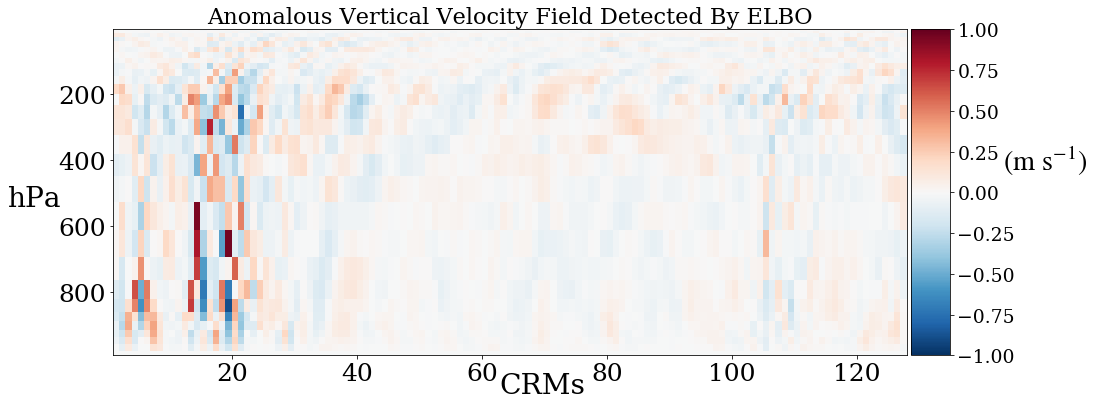

35


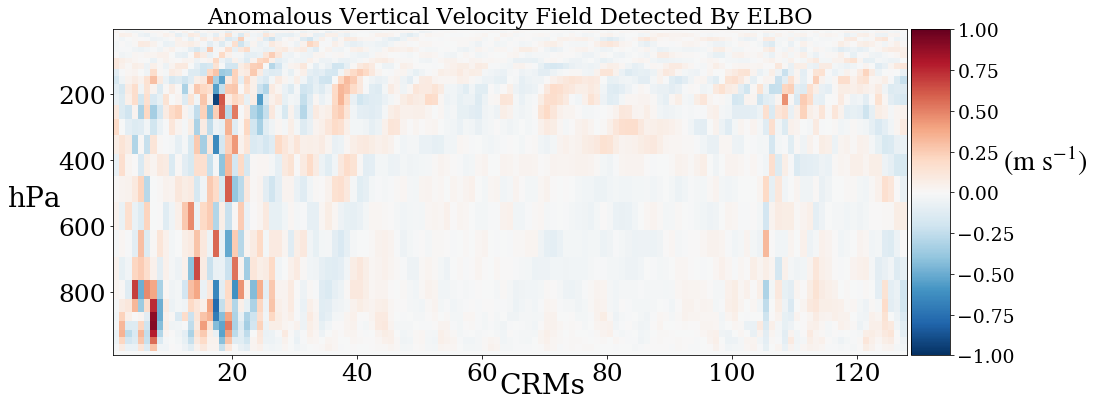

36


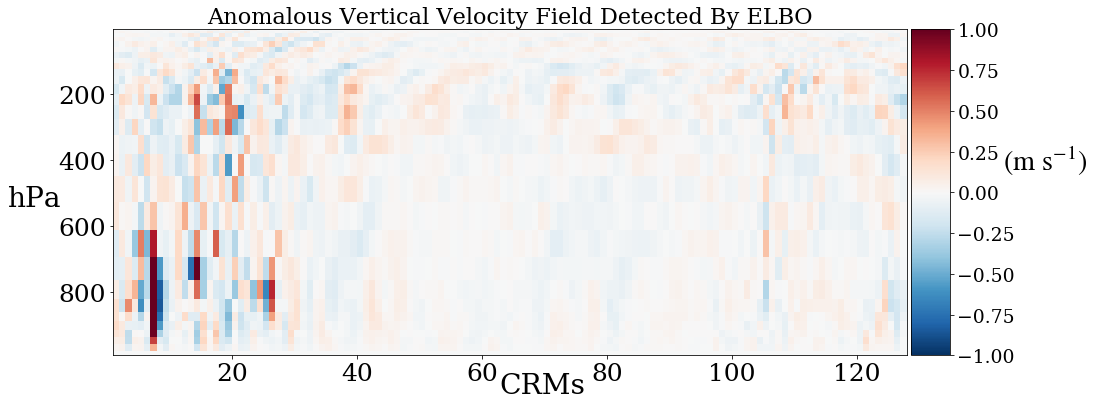

37


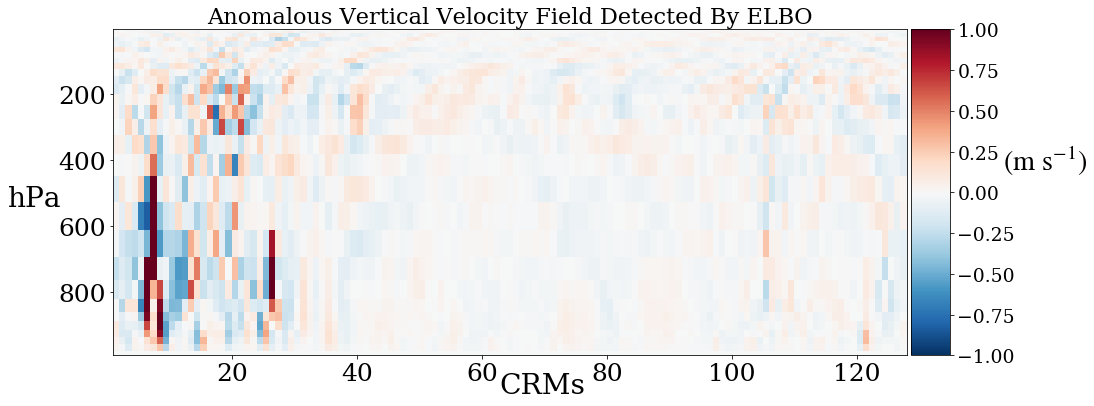

38


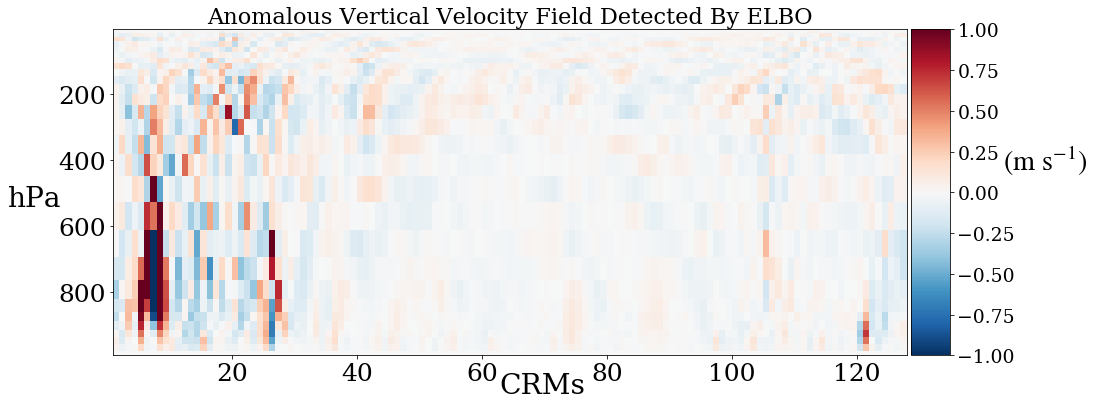

39


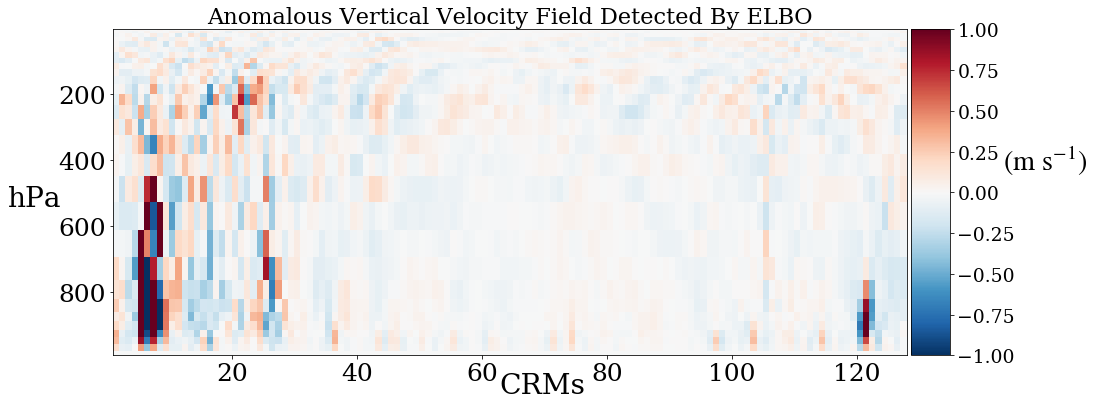

40


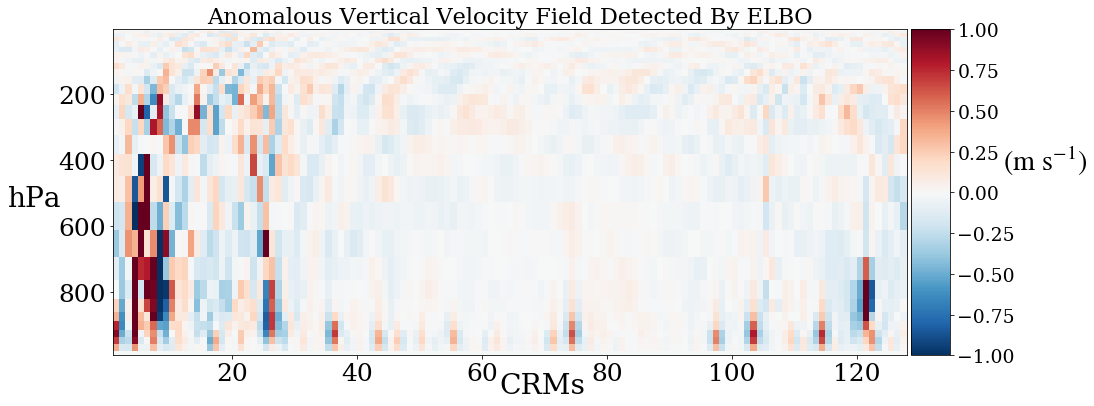

41


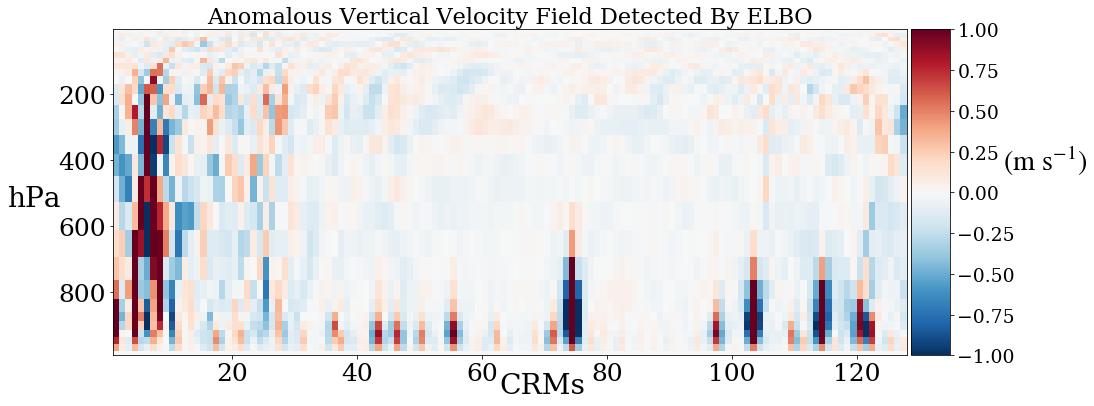

42


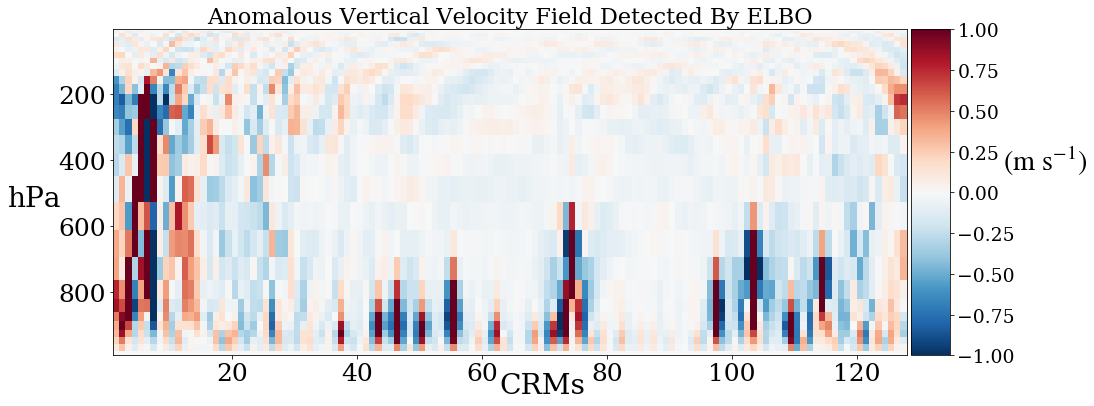

43


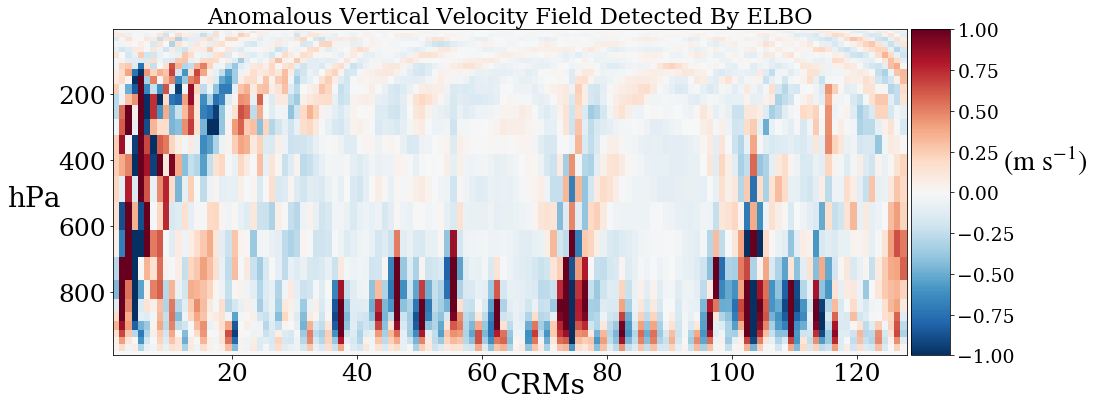

44


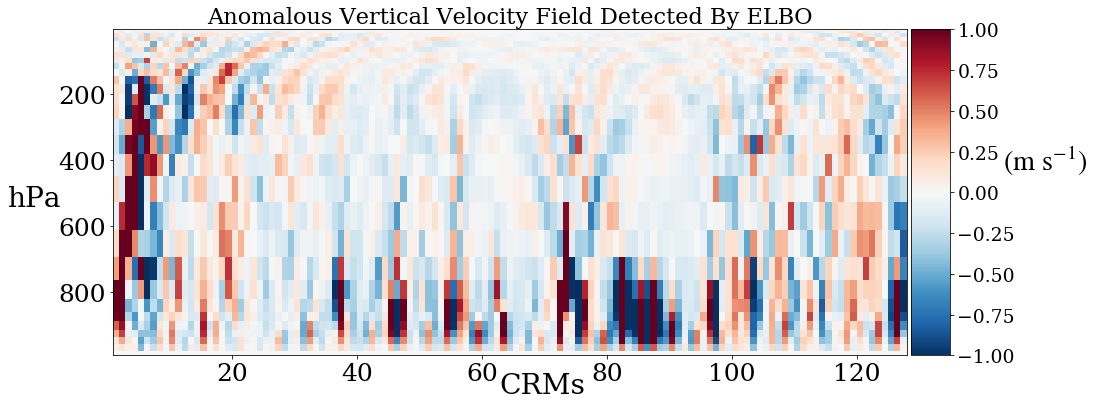

45


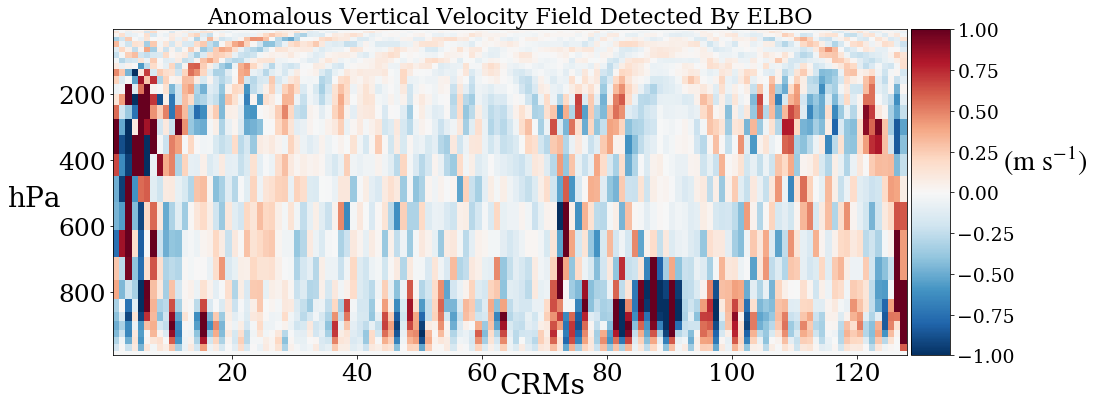

46


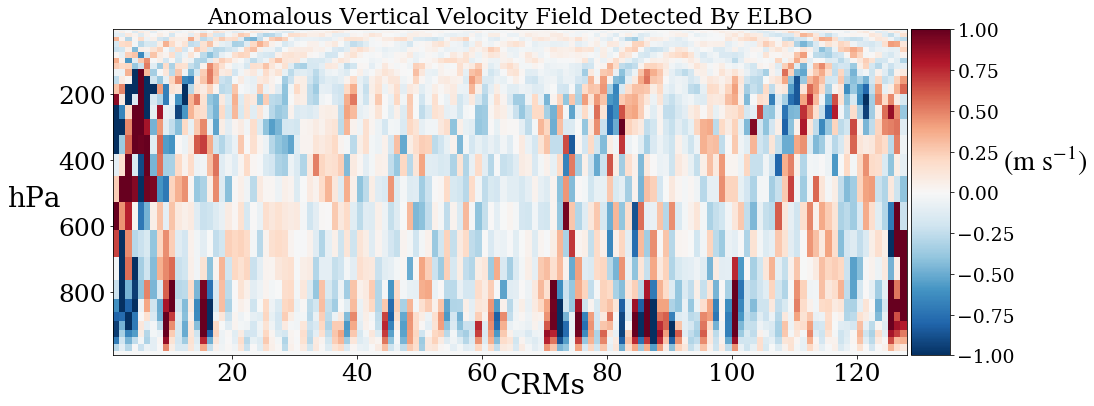

47


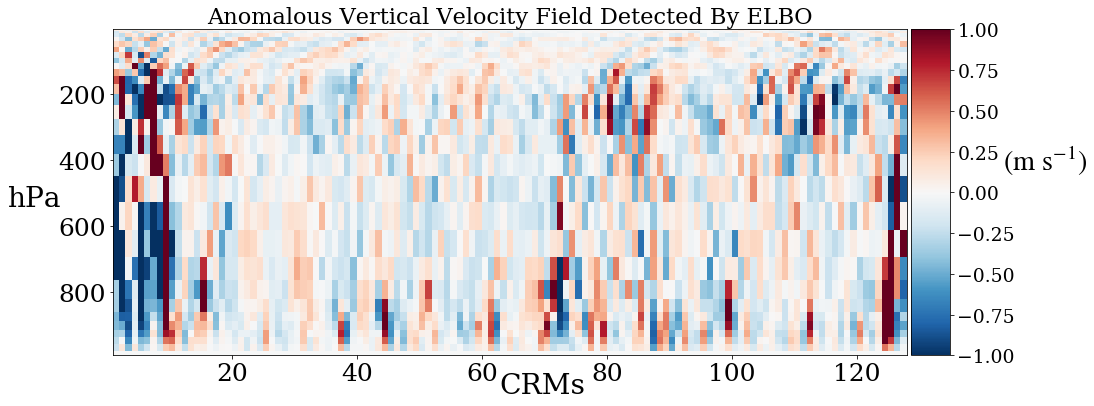

48


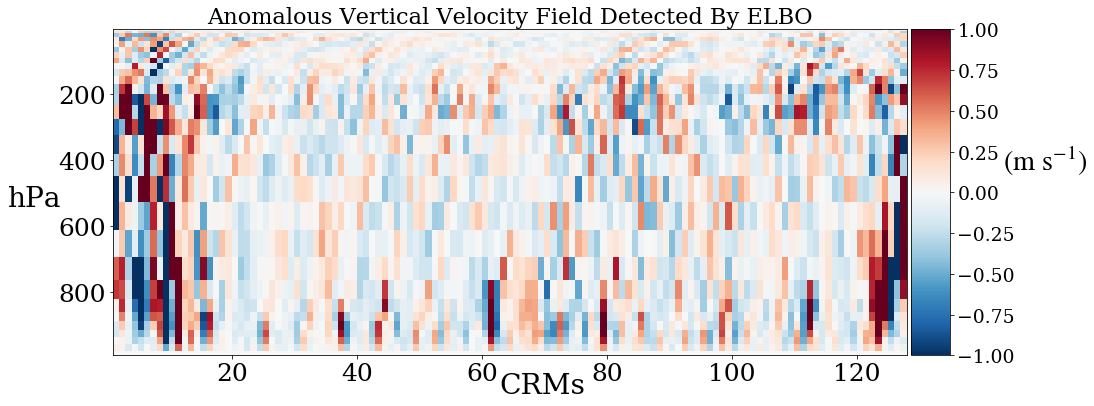

49


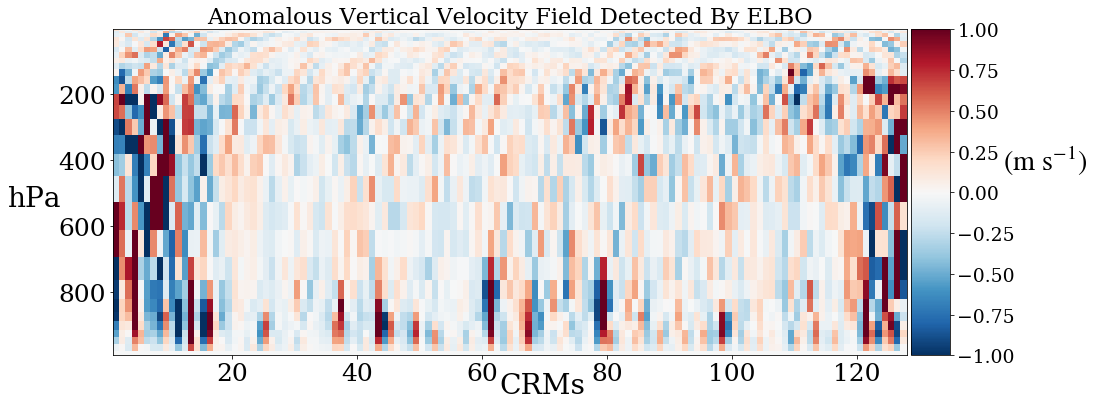

50


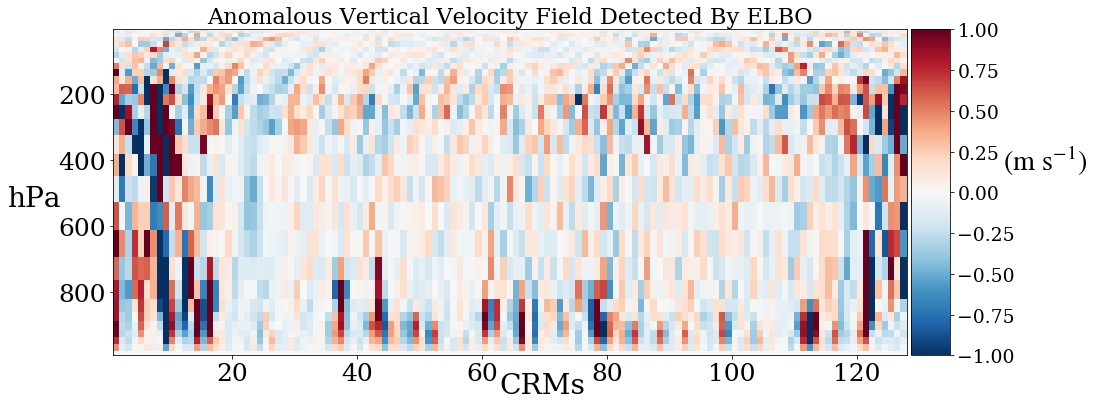

51


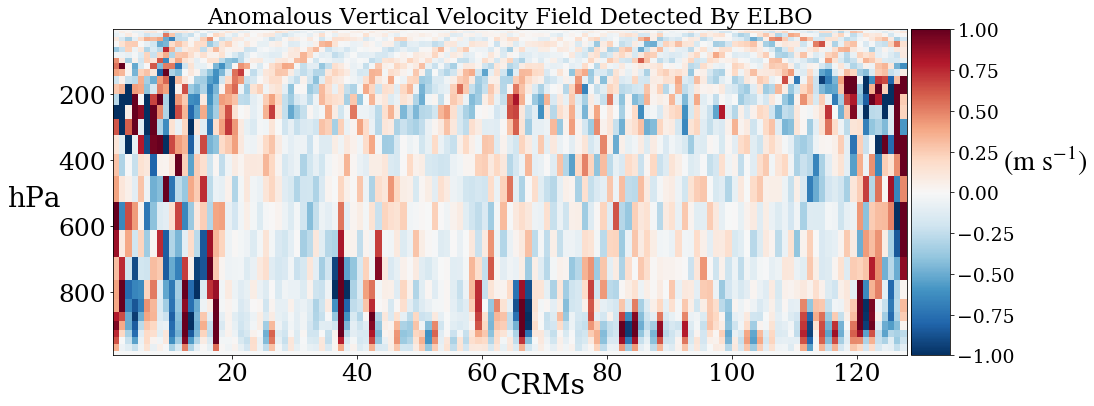

52


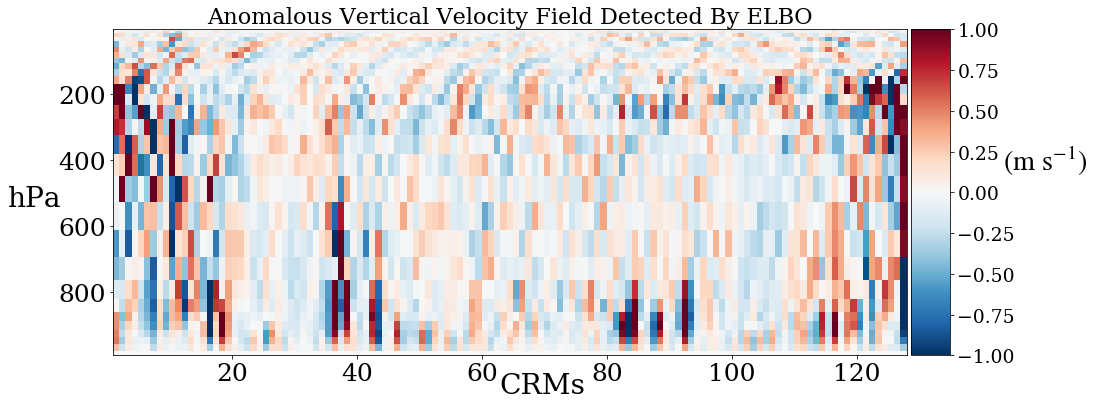

53


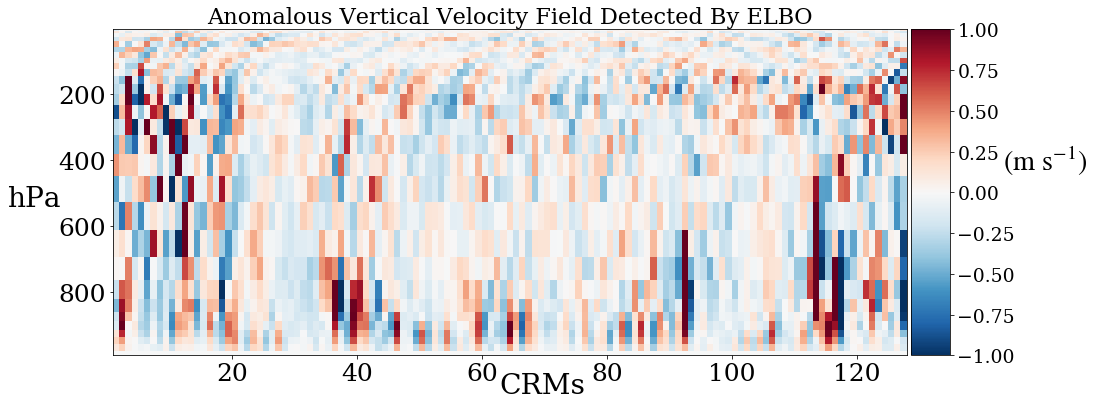

54


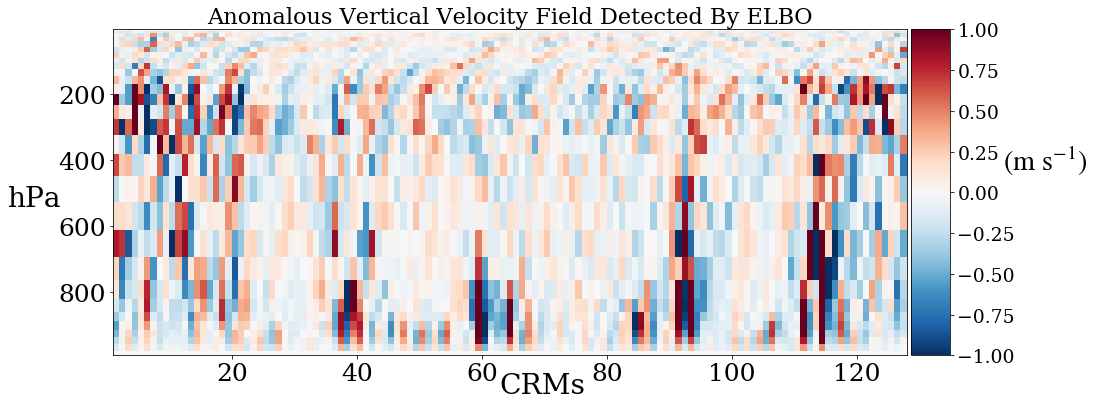

55


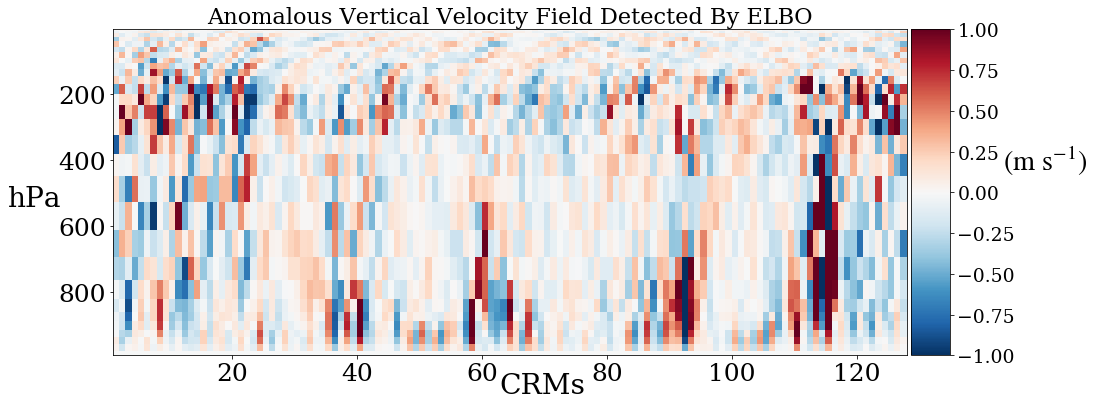

56


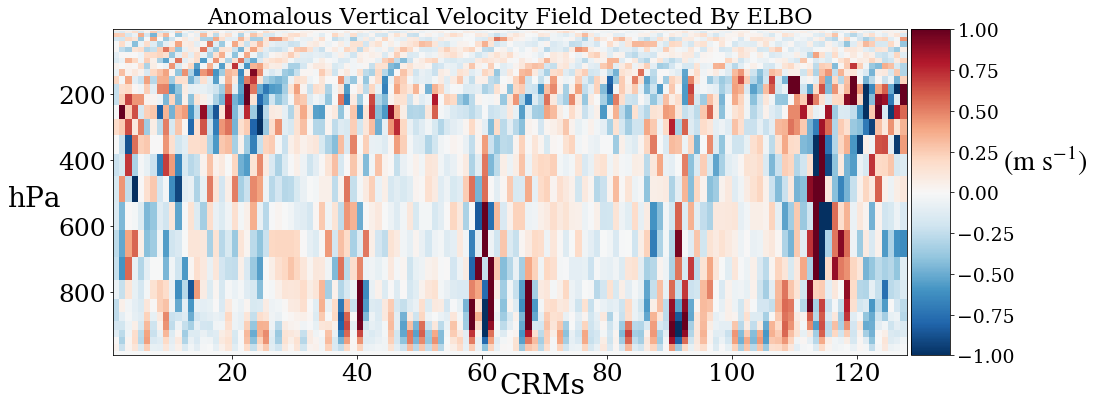

57


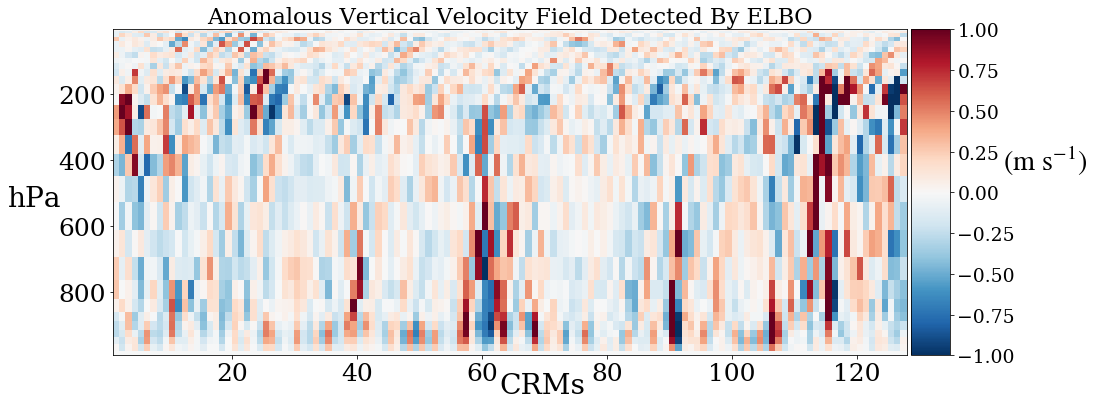

58


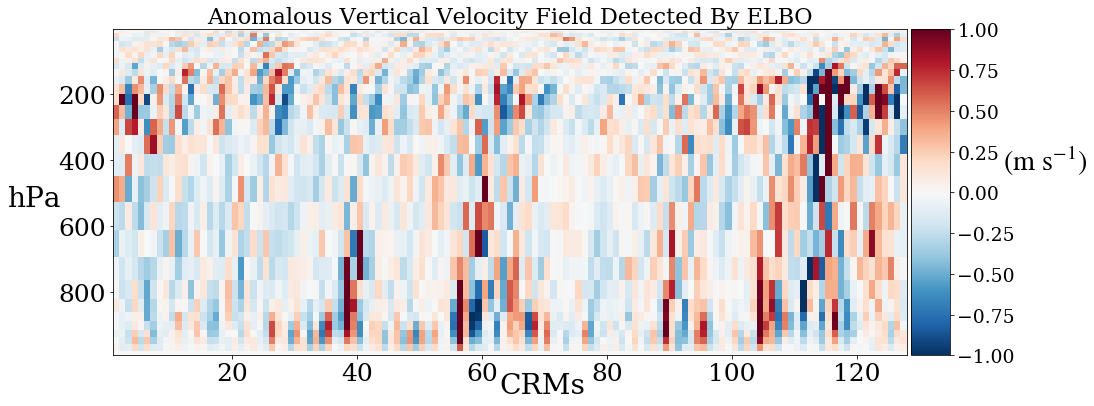

59


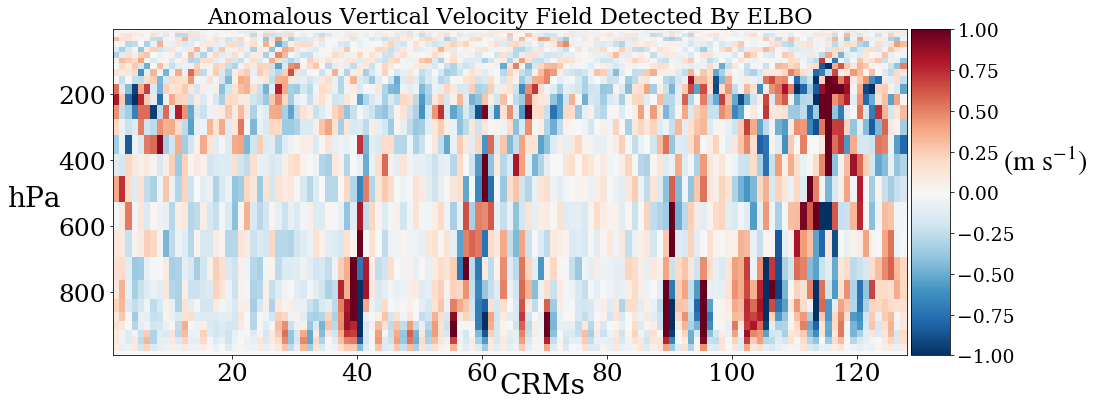

60


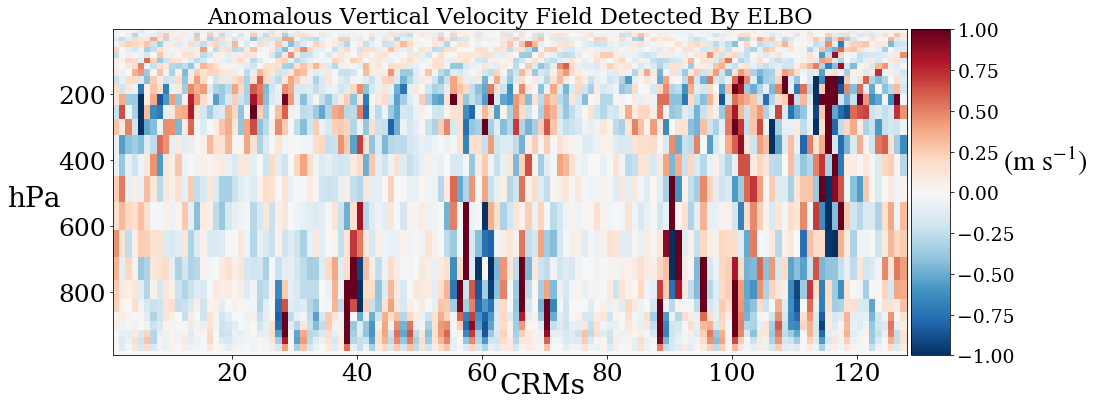

61


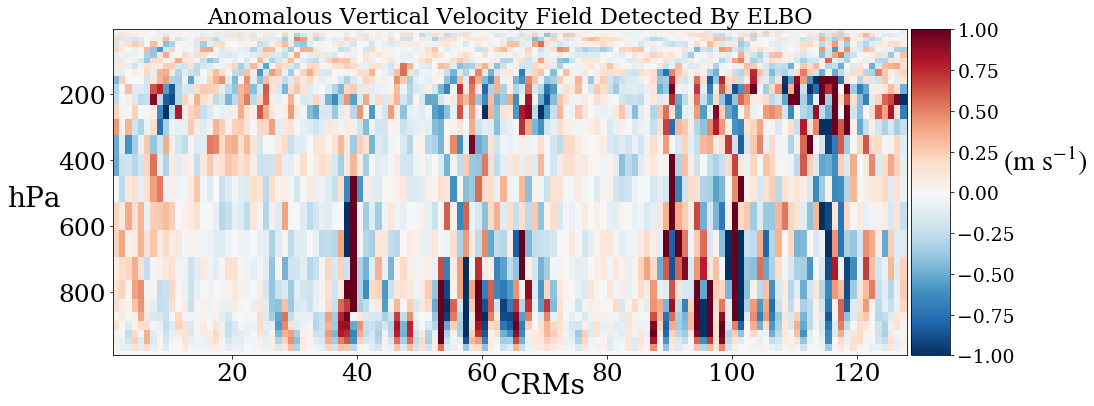

62


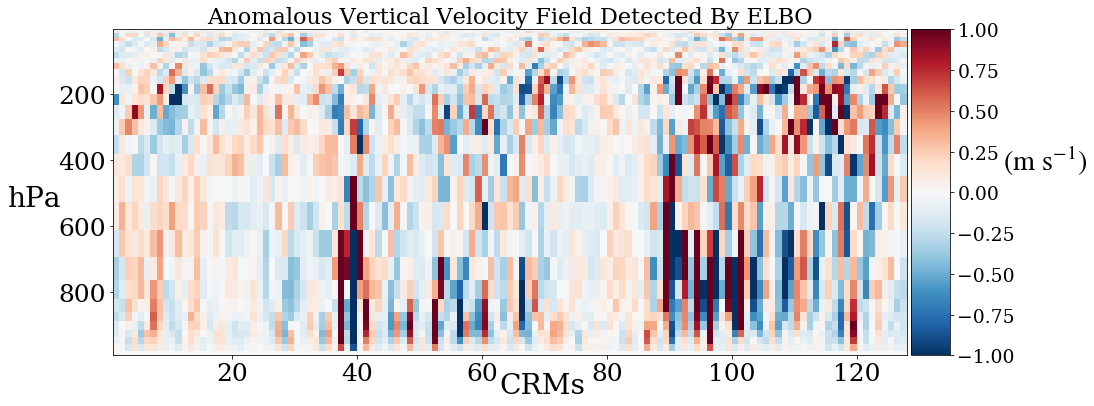

63


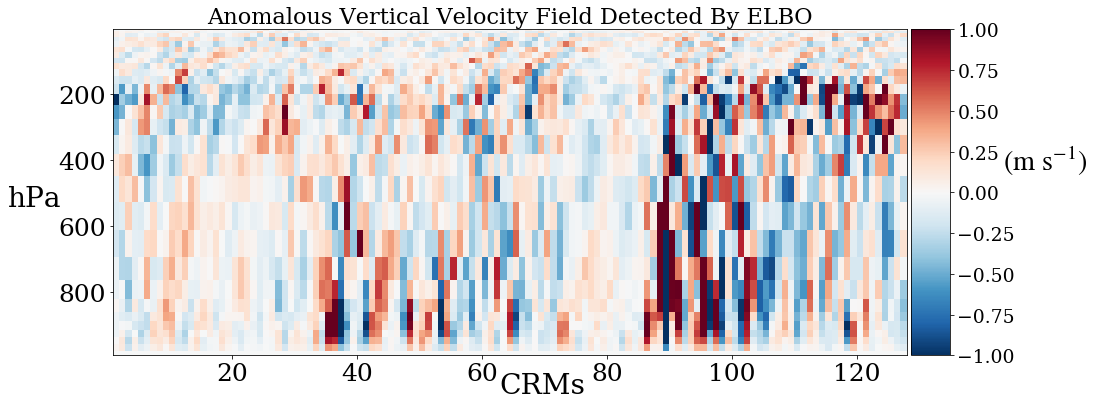

64


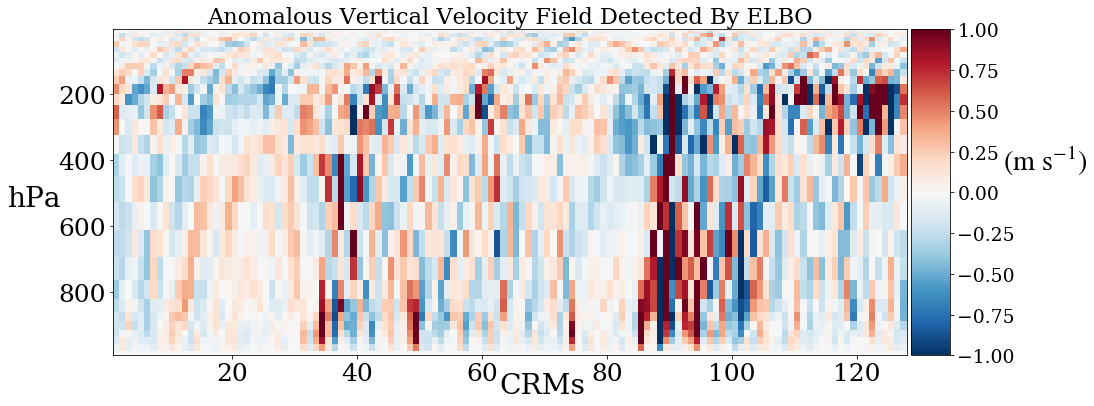

65


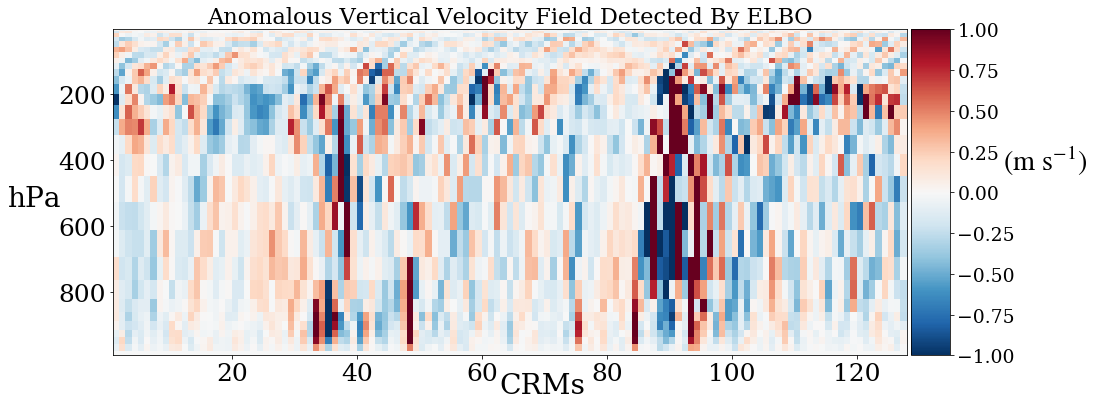

66


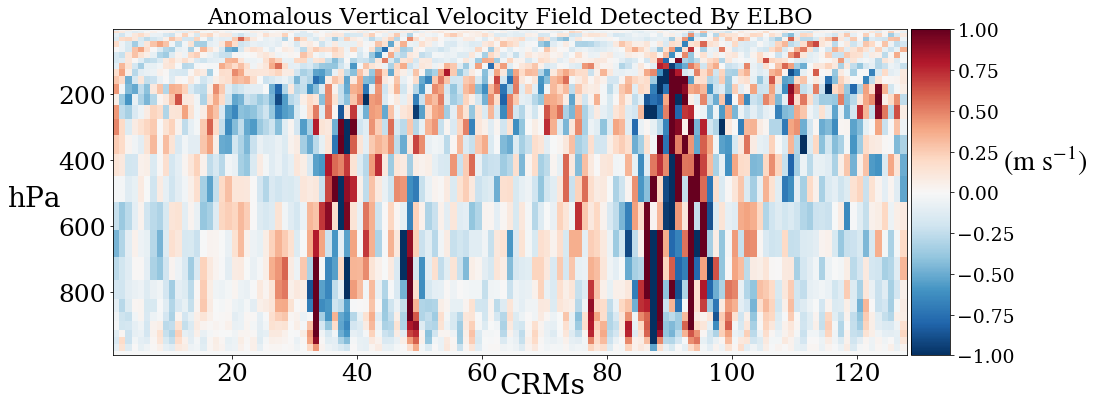

67


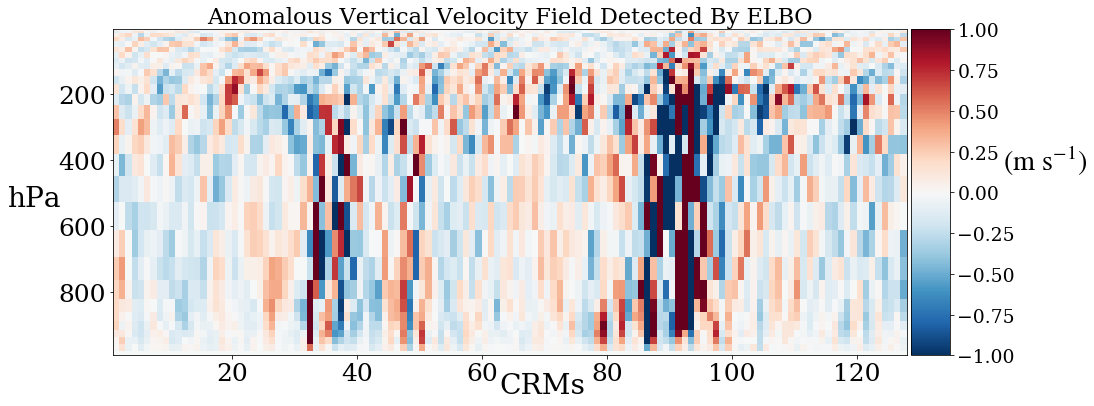

68


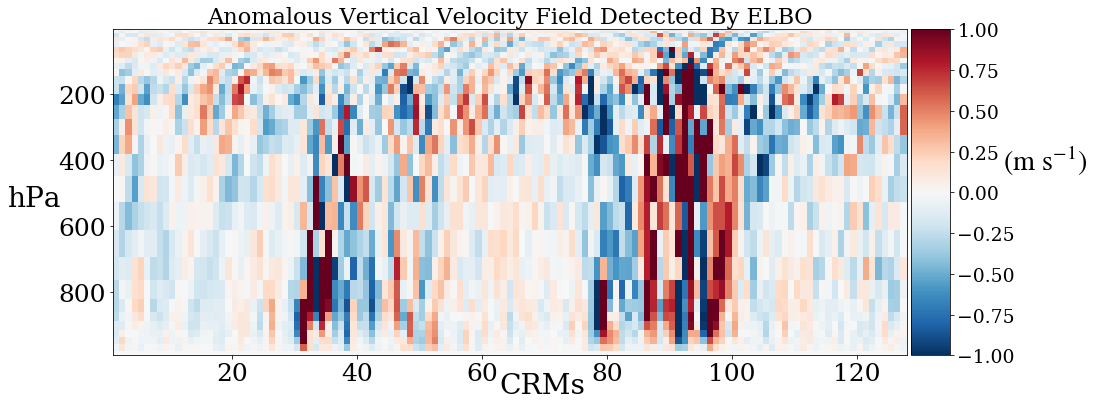

69


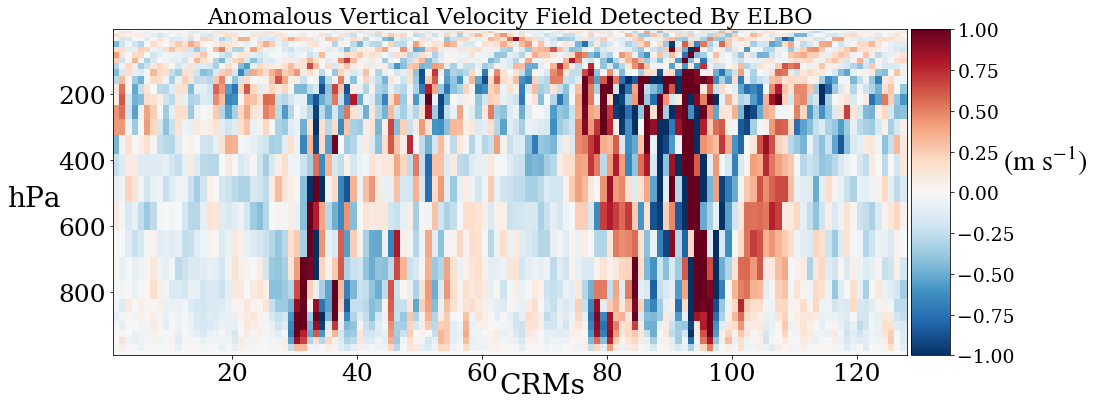

70


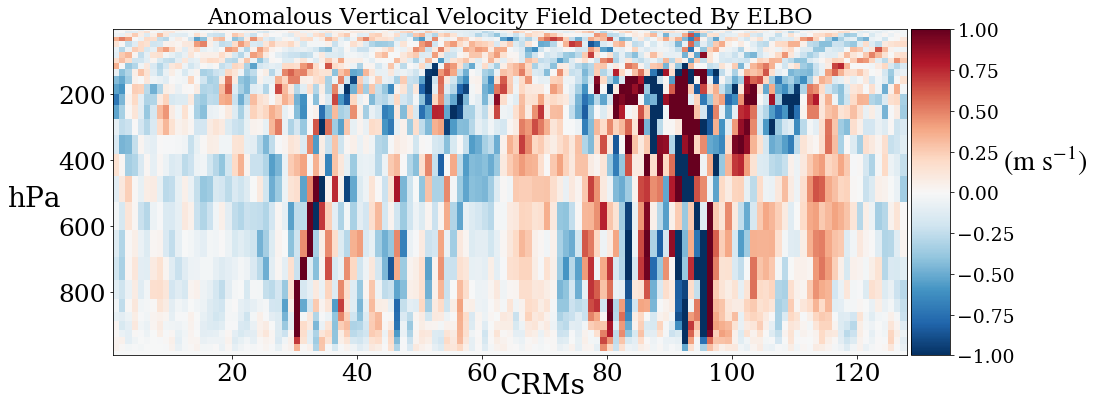

71


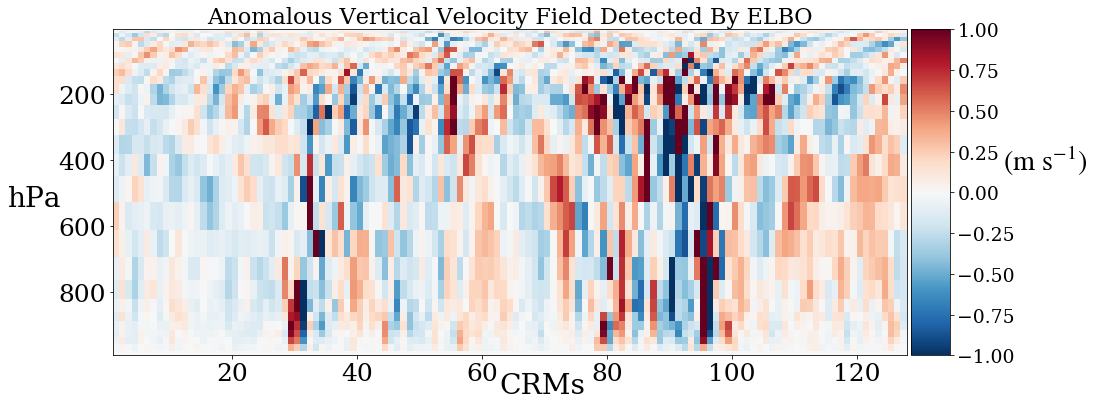

72


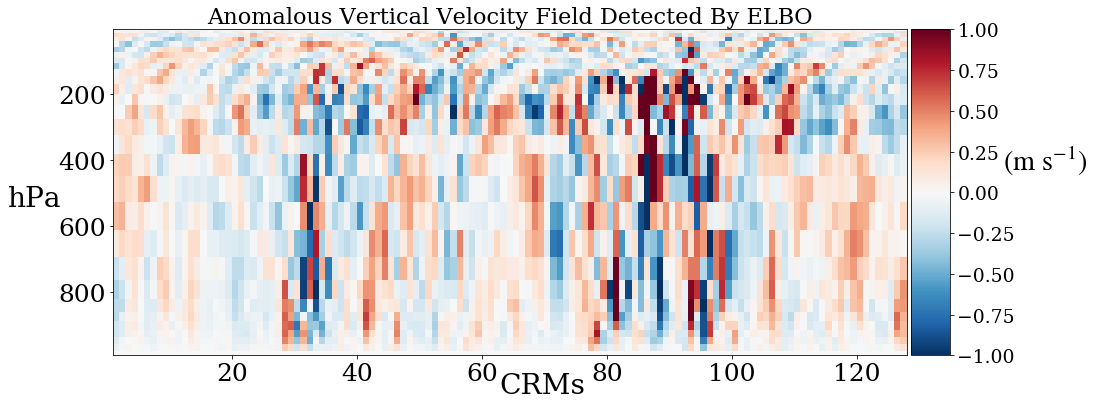

73


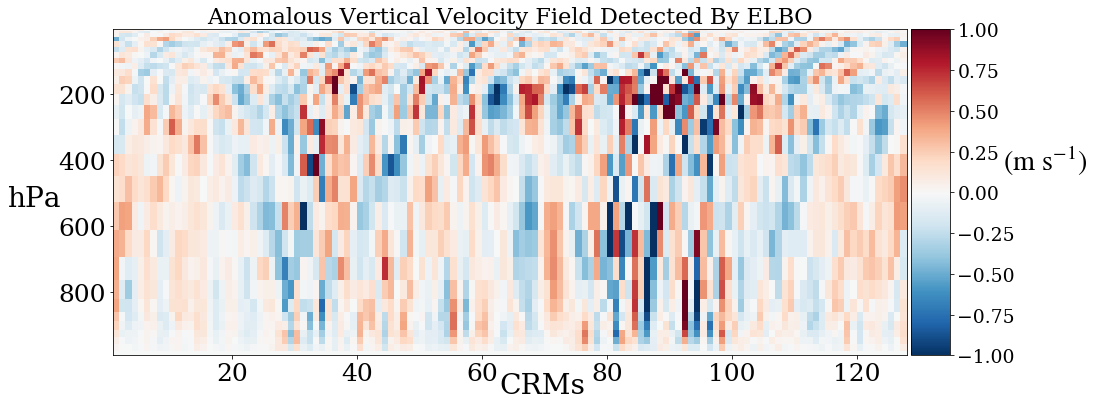

74


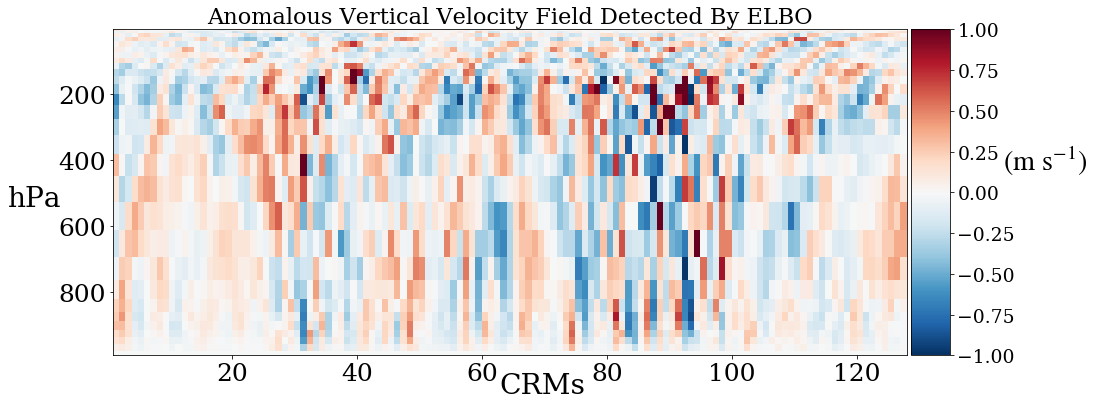

75


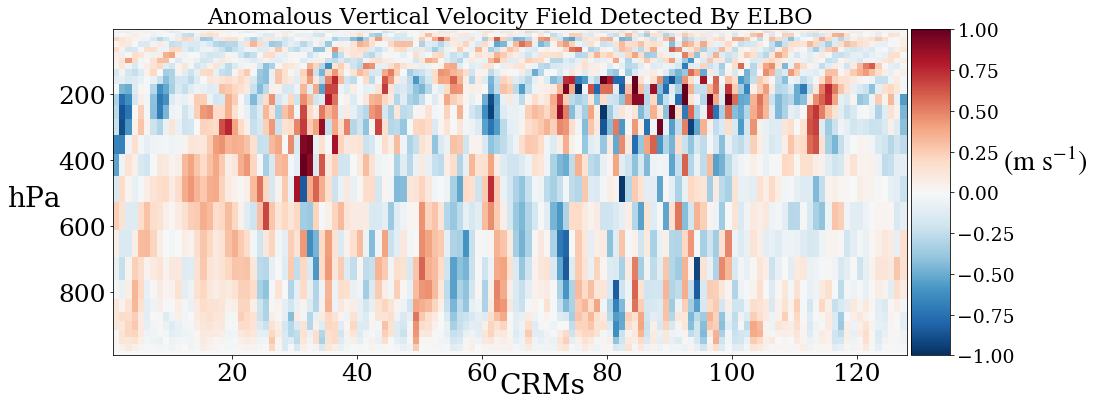

76


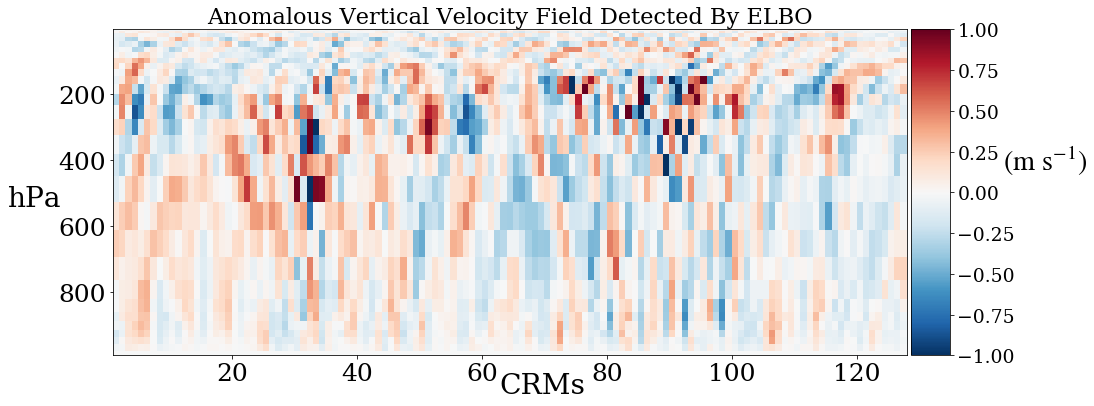

77


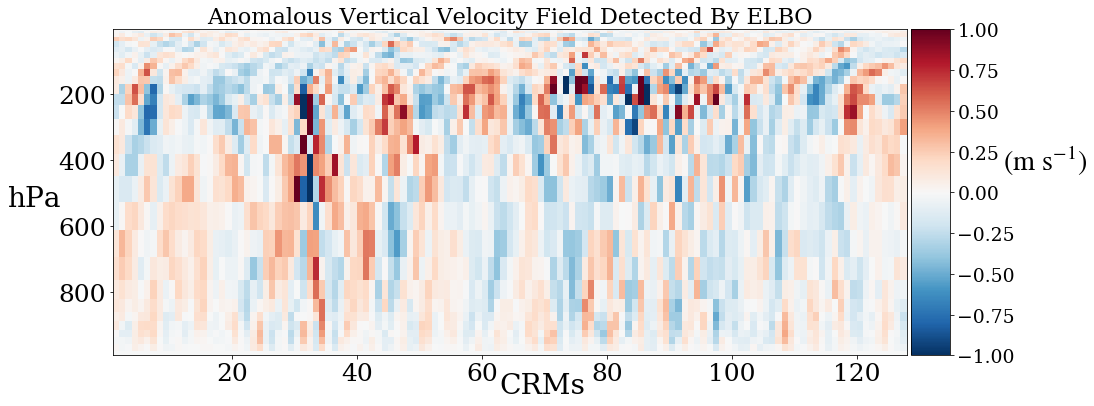

78


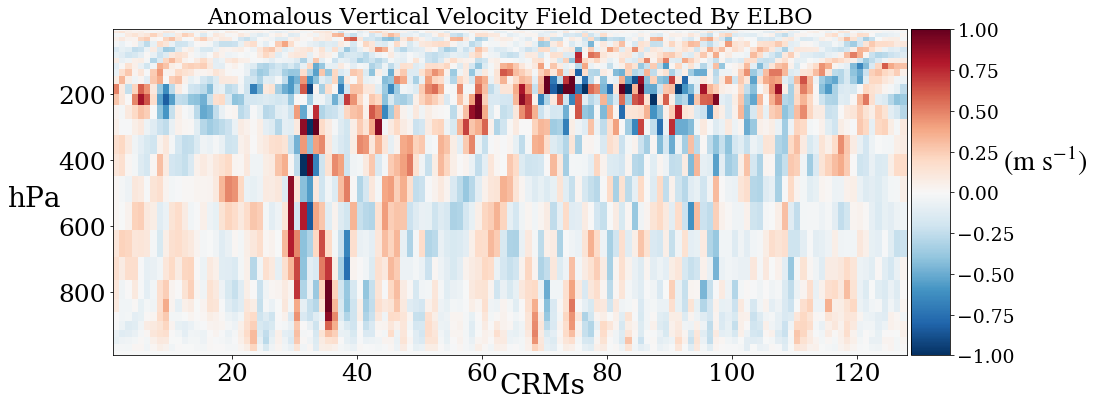

79


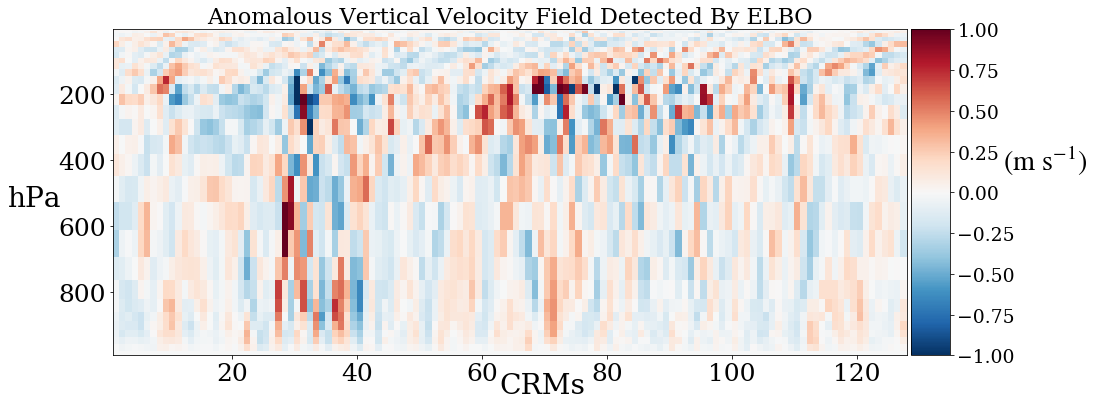

80


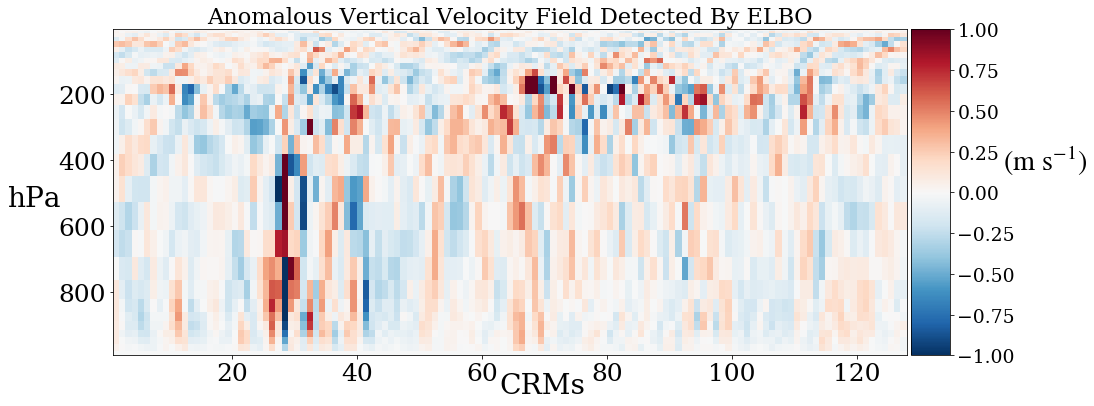

81


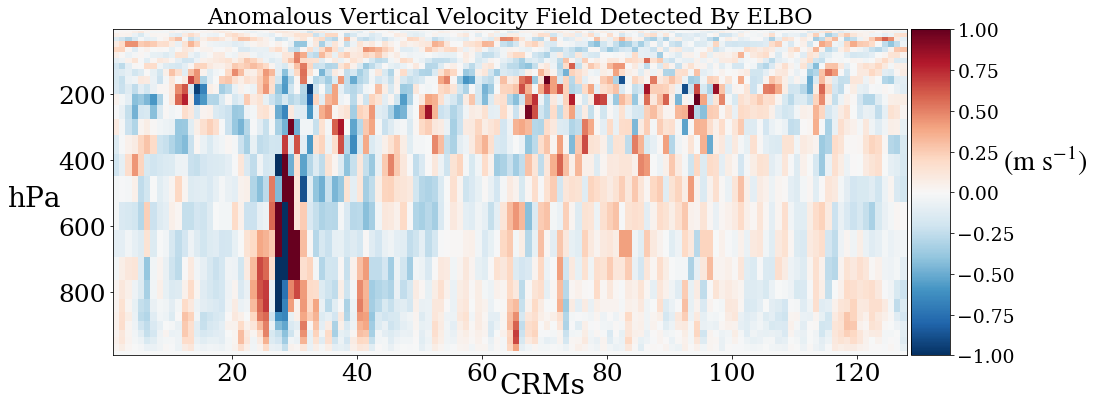

82


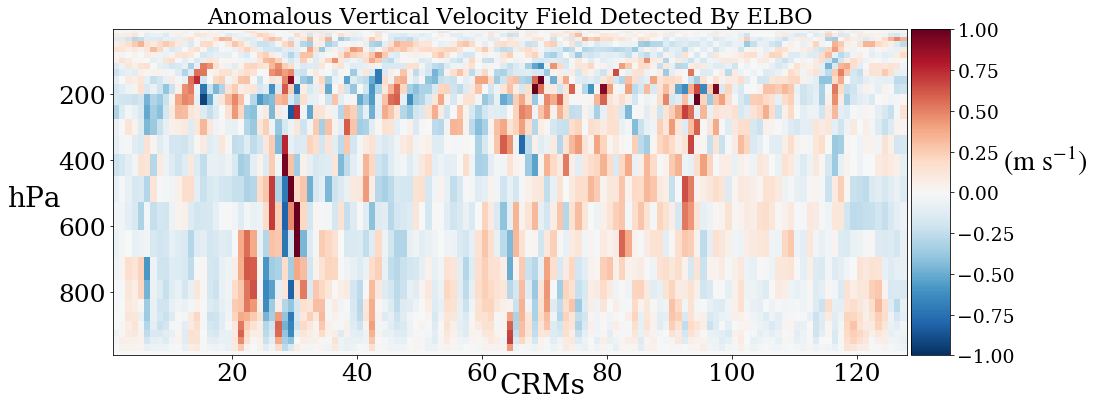

83


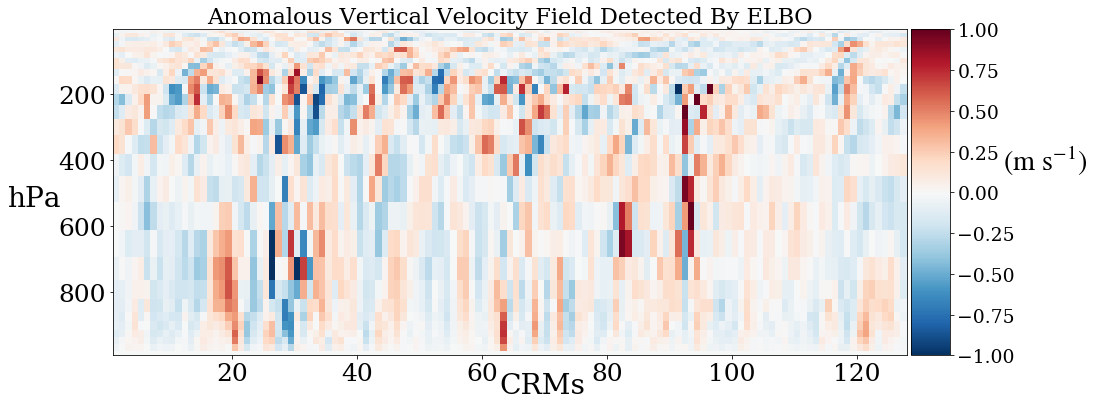

84


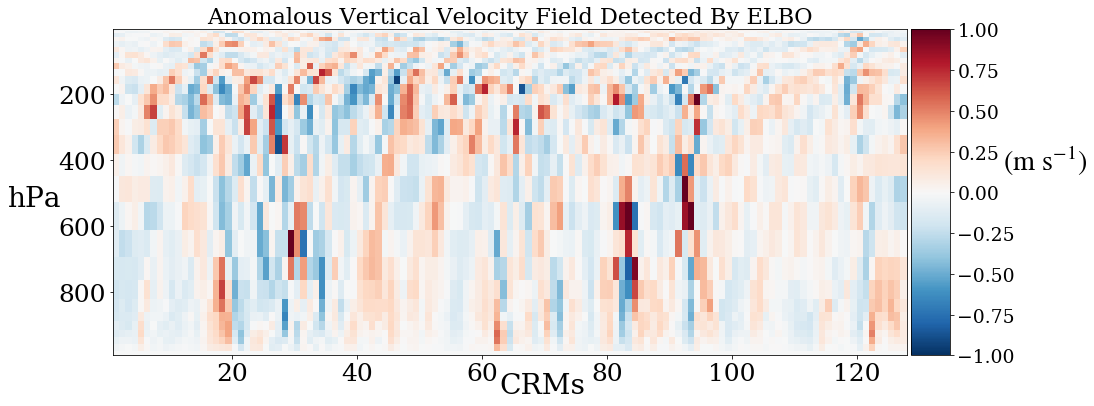

85


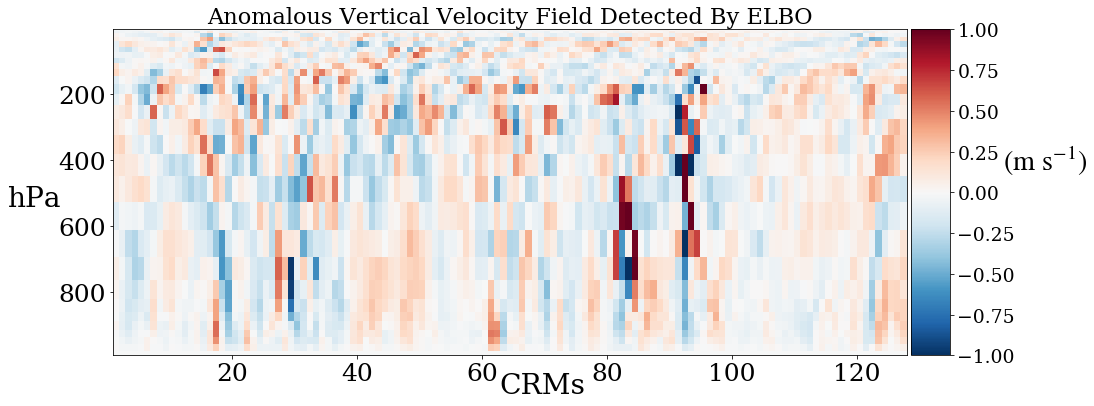

86


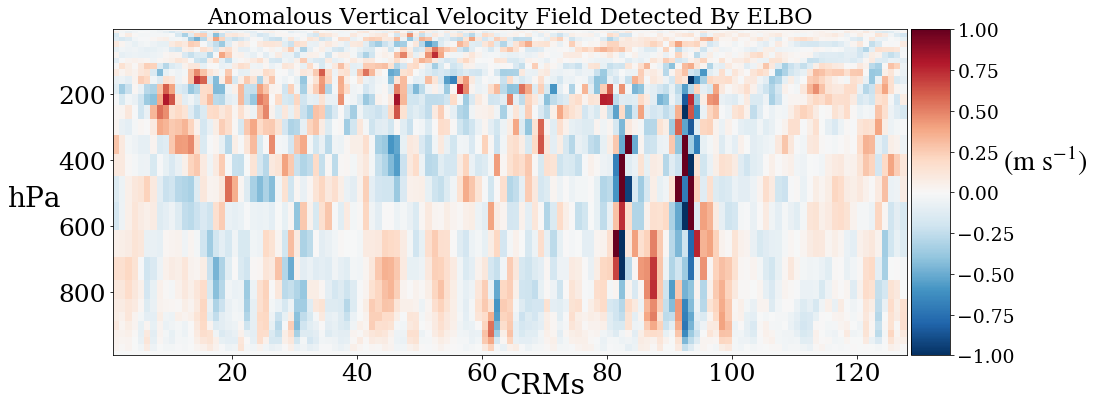

87


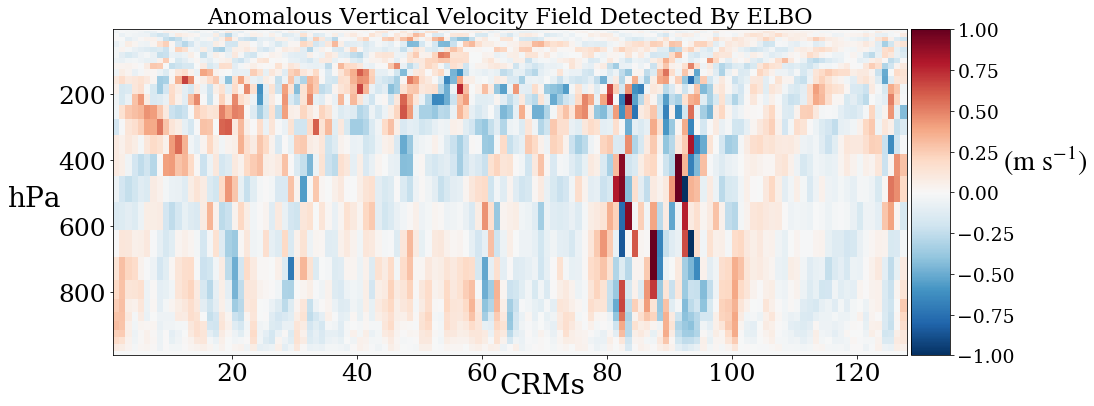

88


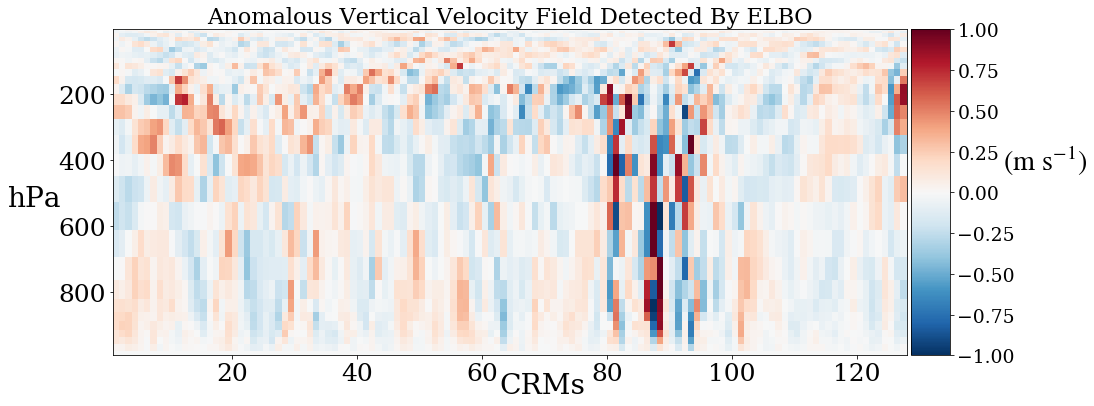

89


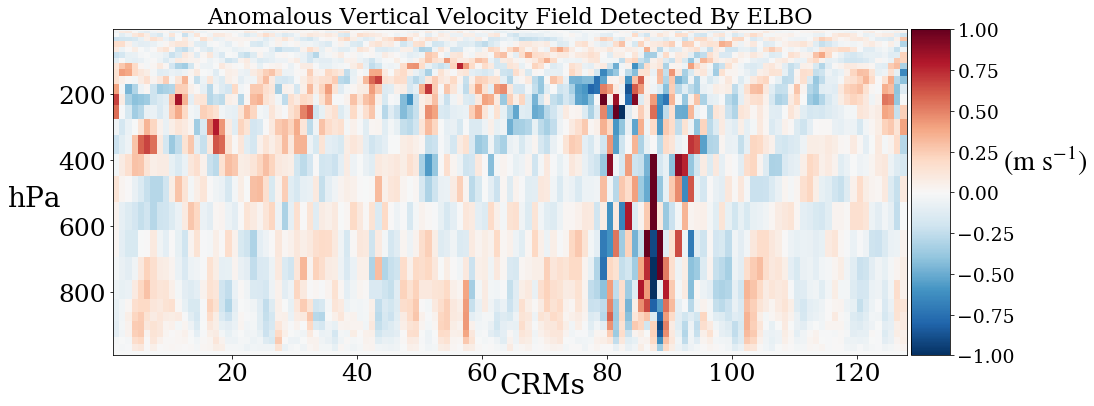

90


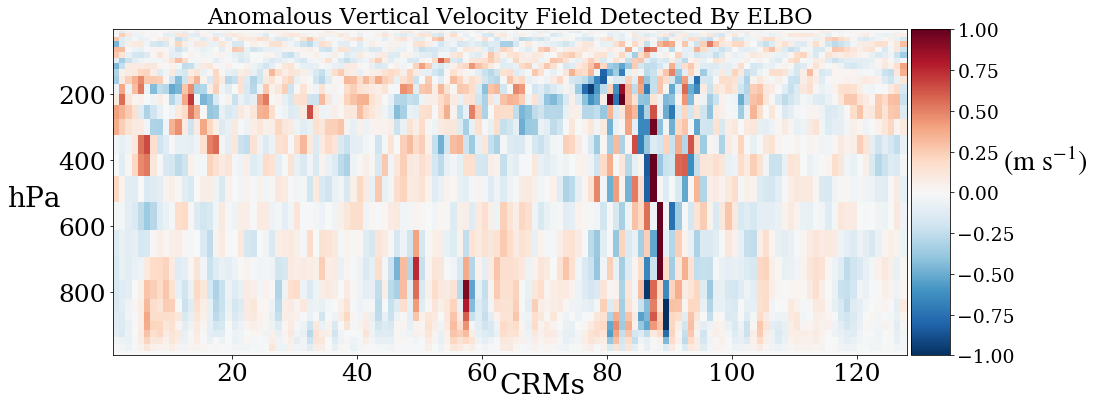

91


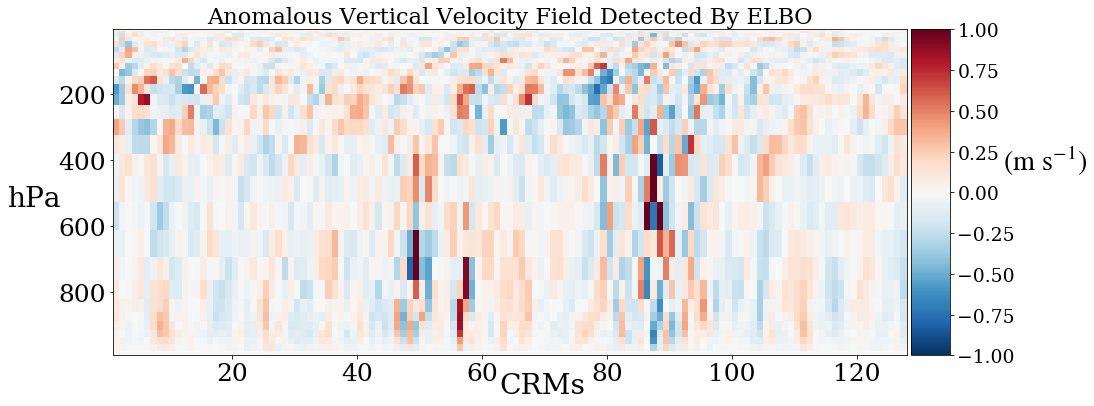

92


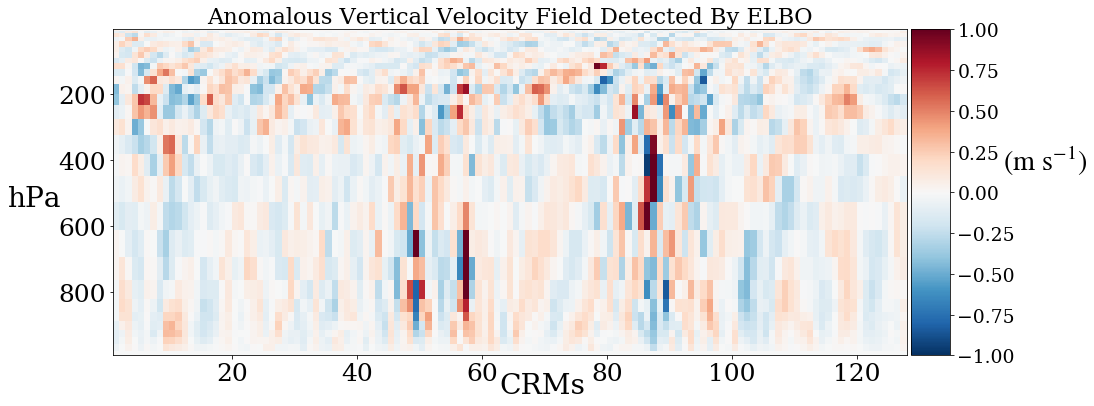

93


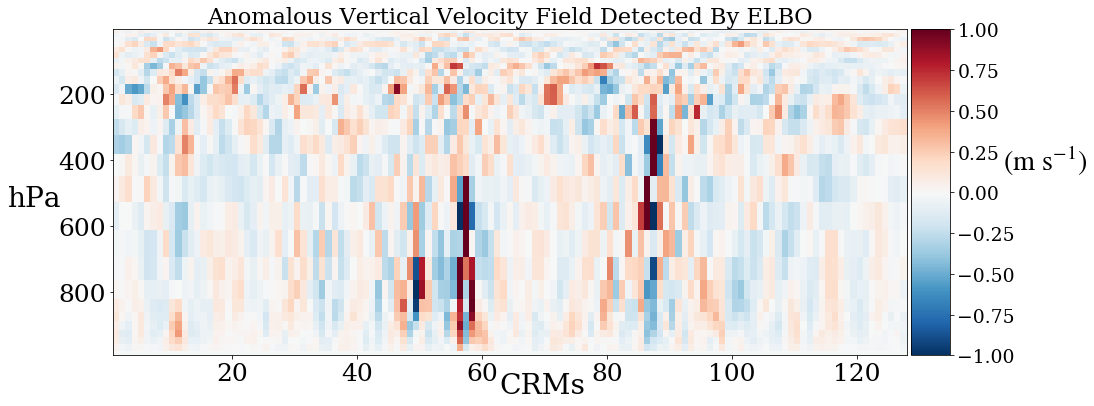

94


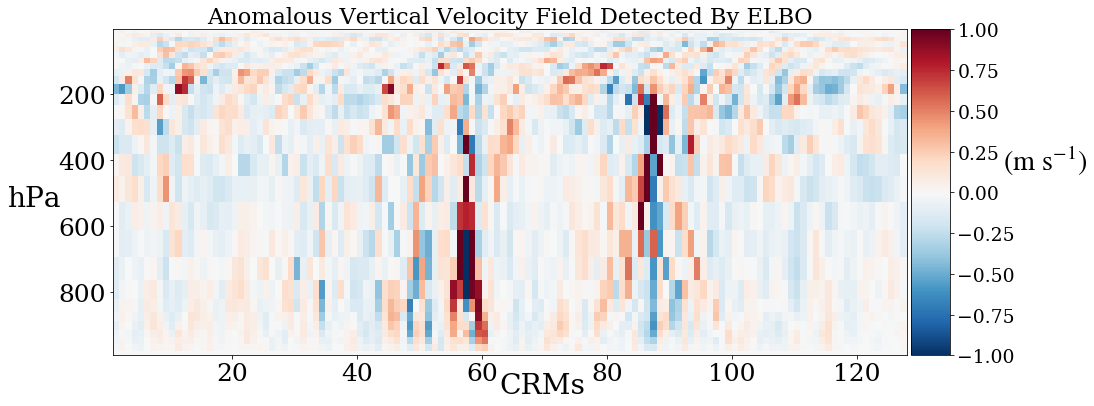

95


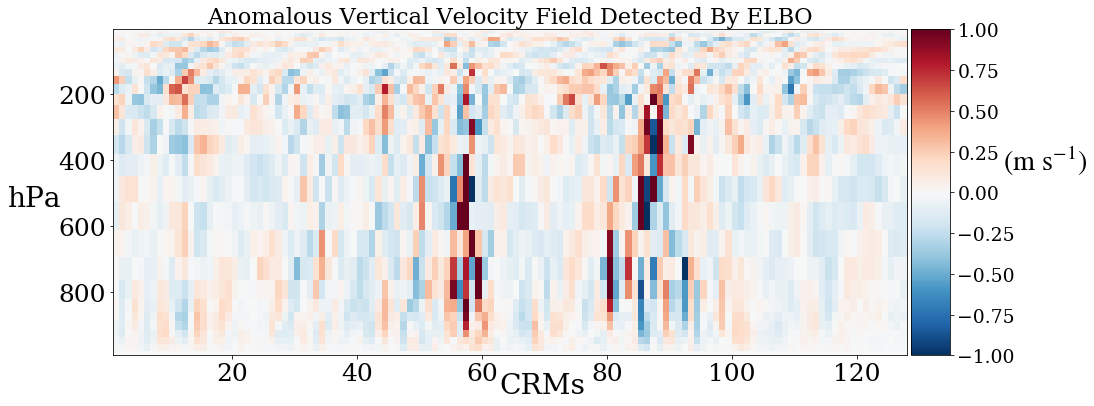

In [8]:
#shallow plume starts at 10
for i in range(len(Day_4_Images)):
    print(i)
    plot_generator_paper(np.squeeze(Day_4_Images[i,:,:]), Xs, Zs)
    

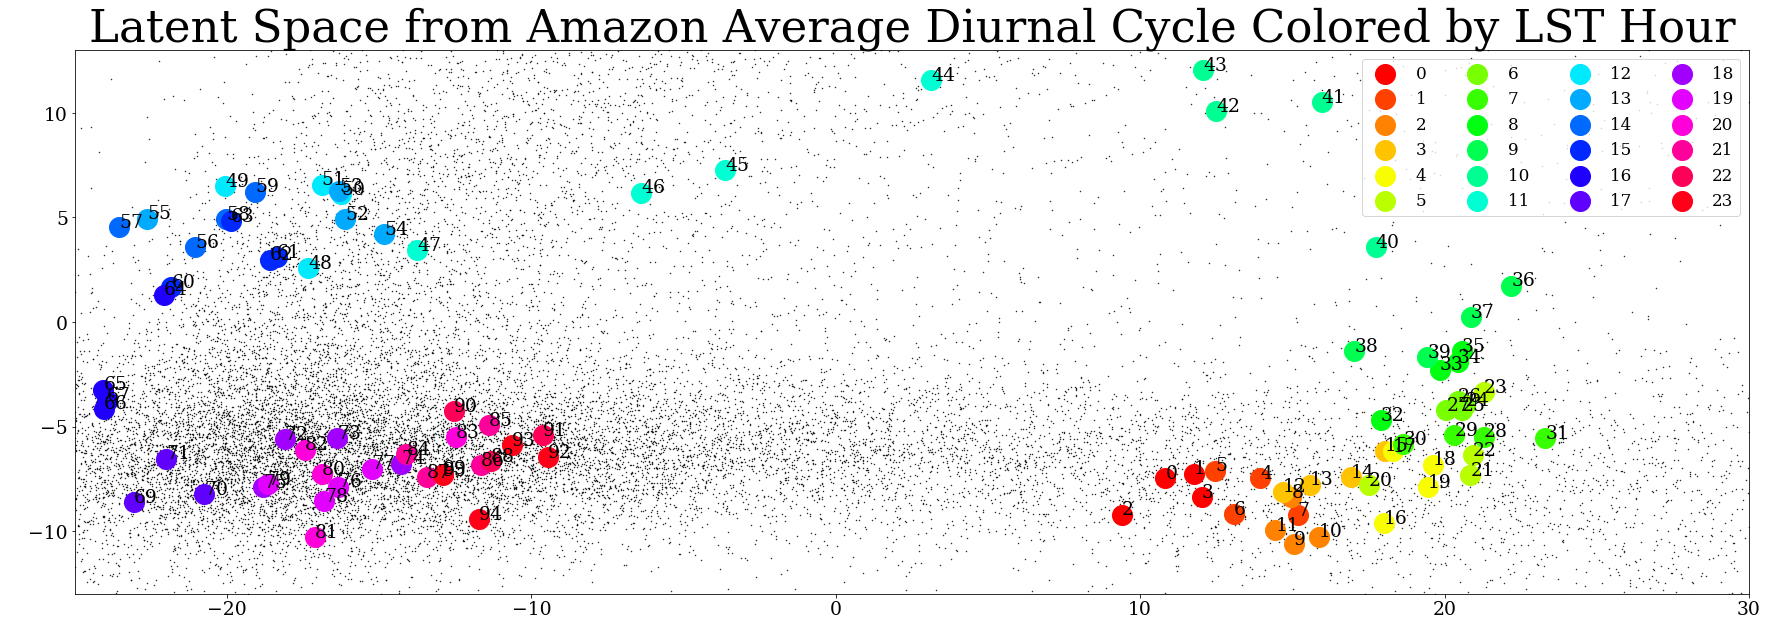

In [9]:
colors = cm.hsv(np.linspace(0, 1, int(len(Day_4_latent_space)/4)))
bc_labels = ["0","1","2","3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
fig, ax = plt.subplots(figsize=(30, 10))
ax.scatter(x=z_test_tsne[:, 0], y=z_test_tsne[:, 1], c="black", s=0.2)
count = -1
for i in range(len(Day_4_latent_space)):
    if i%4 == 0:
        count = count+1
        cb = ax.scatter(x=Day_4_latent_space[i, 0], y=Day_4_latent_space[i, 1], c=colors[count], s=400, label=str(int(i/4)))
    else:
        cb = ax.scatter(x=Day_4_latent_space[i, 0], y=Day_4_latent_space[i, 1], c=colors[count], s=400)
        
#ax.legend(bbox_to_anchor=(0.999, 1.00))
ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
#ax.legend(loc="lower left", mode = "expand", ncol=24, fontsize=fz/2)
ax.set_title("Latent Space from Amazon Average Diurnal Cycle Colored by LST Hour", fontsize=fz*2)
ax.set_ylim(-13, 13)
ax.set_xlim(-25, 30)
for i in range(len(Day_4_latent_space)):
    ax.annotate(str(i), (Day_4_latent_space[i, 0], Day_4_latent_space[i, 1]))

In [10]:
#raw interpolation
#2, 10, 18, 26, 34, 42, 46, 54, 62
spherical_2_10 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/30_min_hov_muller_31_Reconstructed_Images_W_Comp_2_10.npy")
spherical_10_18 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/30_min_hov_muller_31_Reconstructed_Images_W_Comp_10_18.npy")
spherical_18_26 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/30_min_hov_muller_31_Reconstructed_Images_W_Comp_18_26.npy")
spherical_26_34 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/30_min_hov_muller_31_Reconstructed_Images_W_Comp_26_34.npy")
spherical_34_42 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/30_min_hov_muller_31_Reconstructed_Images_W_Comp_34_42.npy")
spherical_42_46 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/30_min_hov_muller_31_Reconstructed_Images_W_Comp_42_46.npy")
spherical_46_54 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/30_min_hov_muller_31_Reconstructed_Images_W_Comp_46_54.npy")
spherical_54_62 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/30_min_hov_muller_31_Reconstructed_Images_W_Comp_54_62.npy")


raw_interpolations = np.concatenate((spherical_2_10, spherical_10_18, spherical_18_26, spherical_26_34, spherical_34_42, spherical_42_46, spherical_46_54, spherical_54_62), axis=0)
raw_interpolations = np.reshape(raw_interpolations, (len(raw_interpolations),30,128))
raw_interpolations = np.interp(raw_interpolations, (0, 1), (Min_Scalar, Max_Scalar))

In [11]:
#averaged intewrpolations
#(0,1,2,3) to (6,7,8,9)
s1 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/Averaged_30_min_hov_muller_31_Reconstructed_Images_W_Comp_1_7.npy")
#(6,7,8,9) to (14,15,16,17)
s2 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/Averaged_30_min_hov_muller_31_Reconstructed_Images_W_Comp_7_15.npy")
#(14,15,16,17) to (23,24,25,26)
s3 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/Averaged_30_min_hov_muller_31_Reconstructed_Images_W_Comp_15_24.npy")
#(23,24,25,26) to (33,34,35,37)
s4 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/Averaged_30_min_hov_muller_31_Reconstructed_Images_W_Comp_24_34.npy")
#(33,34,35,37) to (40,41,42,43)
s5 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/Averaged_30_min_hov_muller_31_Reconstructed_Images_W_Comp_34_41.npy")
#(40,41,42,43) to (44,45,46)
s6 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/Averaged_30_min_hov_muller_31_Reconstructed_Images_W_Comp_41_45.npy")
#(44,45,46) to (47,48,49,50)
s7= np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/Averaged_30_min_hov_muller_31_Reconstructed_Images_W_Comp_45_48.npy")
#(47,48,49,50) to (55,56,57,58)
s8 = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Interpolation_Data/Amazon_Arc_Tracker/Averaged_30_min_hov_muller_31_Reconstructed_Images_W_Comp_48_56.npy")



average_interpolations = np.concatenate((s1, s2, s3, s4, s5, s6, s7, s8), axis=0)
average_interpolations = np.reshape(average_interpolations, (len(average_interpolations),30,128))
average_interpolations = np.interp(average_interpolations, (0, 1), (Min_Scalar, Max_Scalar))

In [15]:
values = np.array([2,10,18,26,34,42,46,54,62])
raw_images = Day_4_Images[values,:]
raw_z = Day_4_latent_space[values,:]

(120, 30, 128)
(120, 30, 128)


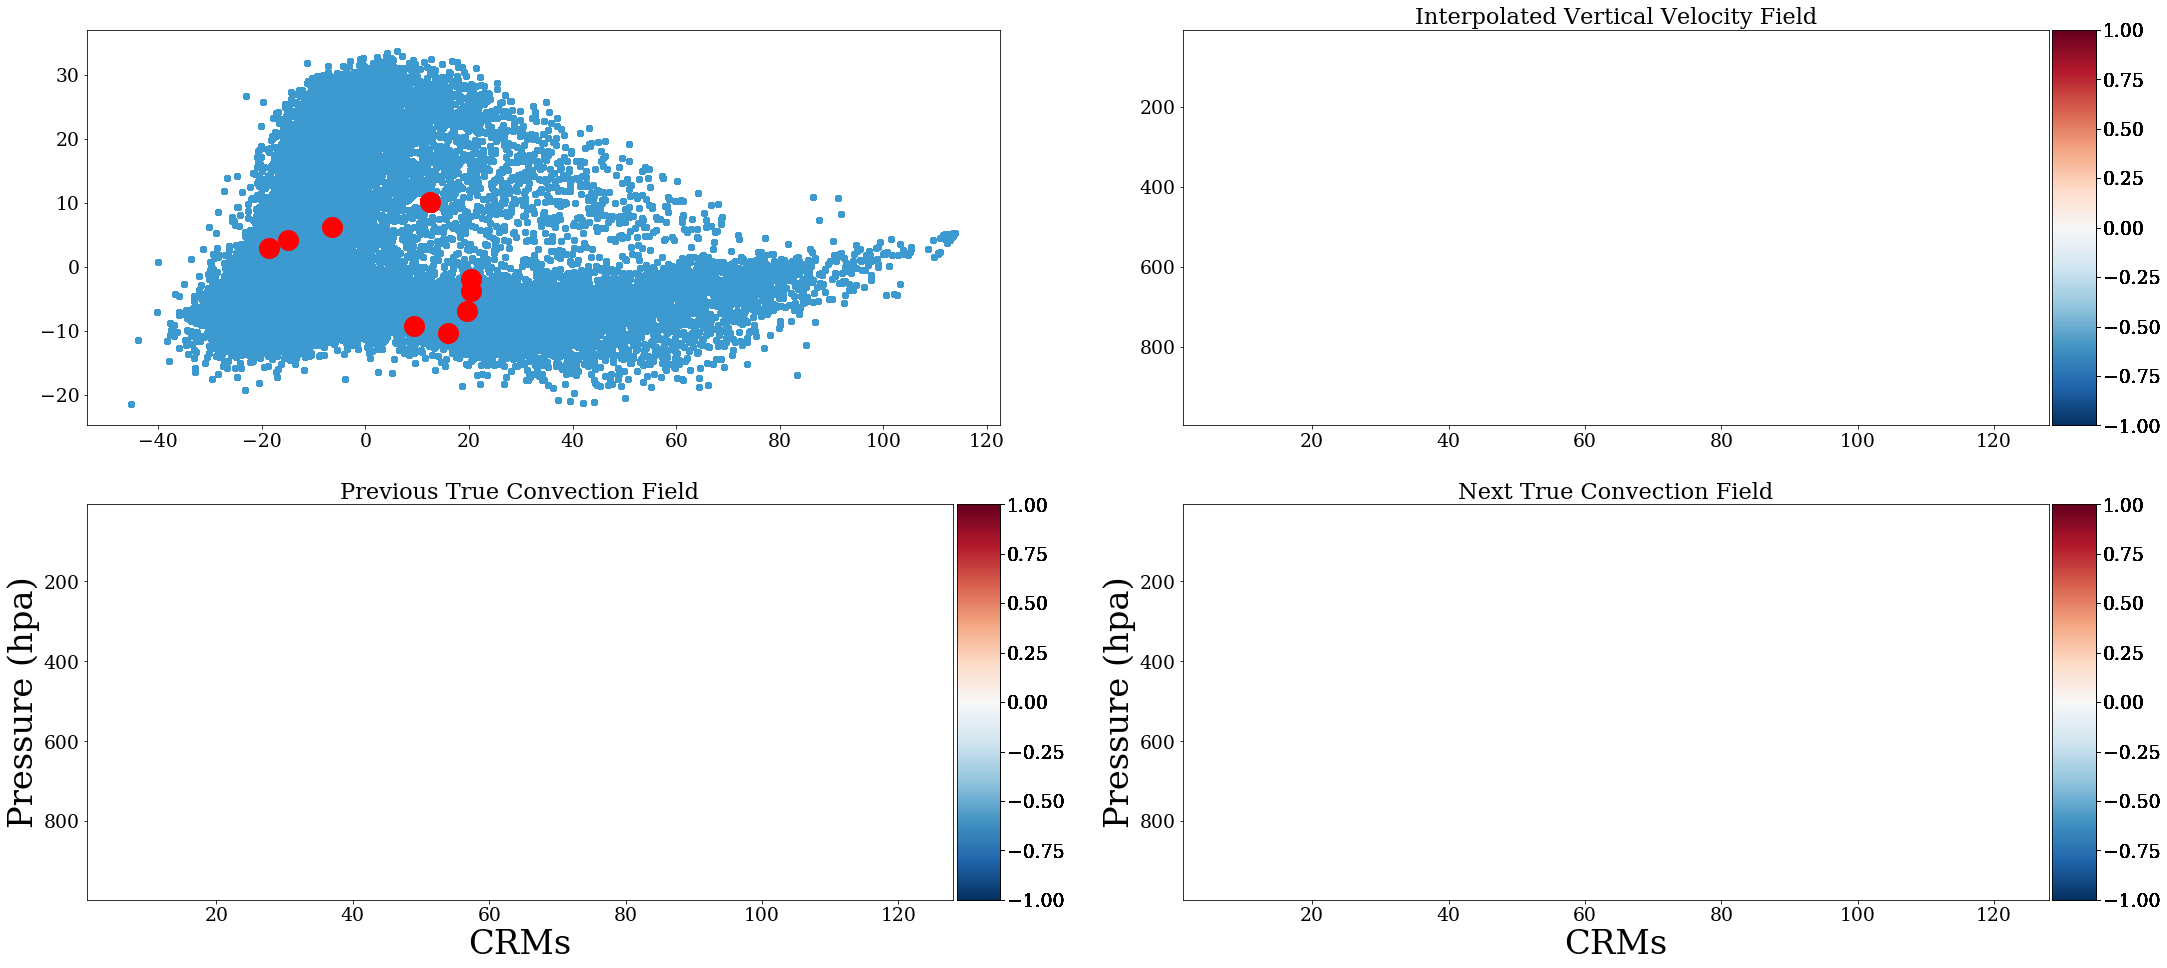

In [24]:
# change vx/vy to location on sorted images
def mikes_horz_latent_animation(latent_space, X, Z, o_images, latents, h_coords):
    fig, ax = plt.subplots(2,2, figsize=(36,16))
    feat_list = []
    #the real total you need
    o_images = o_images.reshape(len(o_images),30,128)
    latents = latents.reshape(len(latents),30,128)
    num_steps = len(latents)
    #num_steps = 10
    cmap= "RdBu_r"
    dummy_orginal = np.zeros(shape=(30,128))
    dummy_orginal[:,:] = np.nan
    dummy_recon = np.zeros(shape=(30,128))
    dummy_recon[:,:] = np.nan
    dummy_latent = np.zeros(shape=(30,128))
    dummy_recon[:,:] = np.nan
    
    count = 29
    true_counter = -1
    one_5_counter = 0
    for i in range(num_steps):
        if i%15 == 0:
            true_counter = true_counter+1
        
        for j in range(len(dummy_orginal)):
            dummy_orginal[count,:] = o_images[true_counter,j,:]
            dummy_recon[count,:] = o_images[true_counter+1,j,:]
            dummy_latent[count,:] = latents[i,j,:]
            count = count-1
        
        h_rect = patches.Circle((h_coords[true_counter, 0]*(1.-one_5_counter/15.0)+h_coords[true_counter+1, 0]*(one_5_counter/15.0),h_coords[true_counter, 1]*(1.0-one_5_counter/15.0)+h_coords[true_counter+1, 1]*(one_5_counter/15.0)),1.0,linewidth=4,edgecolor='black',facecolor='black')

        y_ticks = np.array([1000, 800, 600, 400, 200])
        ax[0,0].scatter(latent_space[:, 0], latent_space[:, 1], c="#3D9AD1",  animated=True)
        
        cb = ax[0,0].scatter(x=h_coords[:, 0], y=h_coords[:, 1], c="Red", s=400, animated=True)
        cs0 = ax[0,0].add_patch(h_rect)
        
        cs1  = ax[0,1].pcolor(X, Z, dummy_latent, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        ax[0,1].set_title("Interpolated Vertical Velocity Field")
        ax[0,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs1, cax=cax)
        
        cs2  = ax[1,0].pcolor(X, Z, dummy_orginal, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        ax[1,0].set_title("Previous True Convection Field")
        ax[1,0].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,0].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,0].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,0])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs2, cax=cax)
        
        cs3 = ax[1,1].pcolor(X, Z, dummy_recon, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        ax[1,1].set_title("Next True Convection Field")
        ax[1,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs3, cax=cax)
        
        feat_list.append([cs2, cs3, cs1, cs0])
        
        count = 29 
        count_latent=7
        one_5_counter = one_5_counter+1
        if one_5_counter >= 15:
            one_5_counter = 0
            
    ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
    ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Movies/Convection_Path_Tracker.mp4')
    plt.show()
        
    
mikes_horz_latent_animation(z_test_tsne, Xs, Zs, raw_images, raw_interpolations, raw_z)

In [34]:
#averaged intewrpolations
#(0,1,2,3) 
values = np.array([0,1,2,3])
r1 = np.expand_dims(np.nanmean(Day_4_Images[values,:], axis=0), axis=0)
z1 = np.expand_dims(np.nanmean(Day_4_latent_space[values,:], axis=0), axis=0)
#(6,7,8,9)
values = np.array([6,7,8,9])
r2 = np.expand_dims(np.nanmean(Day_4_Images[values,:], axis=0), axis=0)
z2 = np.expand_dims(np.nanmean(Day_4_latent_space[values,:], axis=0), axis=0)
#((14,15,16,17)
values = np.array([14,15,16,17])
r3 = np.expand_dims(np.nanmean(Day_4_Images[values,:], axis=0), axis=0)
z3 = np.expand_dims(np.nanmean(Day_4_latent_space[values,:], axis=0), axis=0)
#(23,24,25,26)
values = np.array([23,24,25,26])
r4 = np.expand_dims(np.nanmean(Day_4_Images[values,:], axis=0), axis=0)
z4 = np.expand_dims(np.nanmean(Day_4_latent_space[values,:], axis=0), axis=0)
#((33,34,35,37)
values = np.array([33,34,35,37])
r5 = np.expand_dims(np.nanmean(Day_4_Images[values,:], axis=0), axis=0)
z5 = np.expand_dims(np.nanmean(Day_4_latent_space[values,:], axis=0), axis=0)
#(40,41,42,43)
values = np.array([40,41,42,43])
r6 = np.expand_dims(np.nanmean(Day_4_Images[values,:], axis=0), axis=0)
z6 = np.expand_dims(np.nanmean(Day_4_latent_space[values,:], axis=0), axis=0)
#(44,45,46)
values = np.array([44,45,46])
r7 = np.expand_dims(np.nanmean(Day_4_Images[values,:], axis=0), axis=0)
z7 = np.expand_dims(np.nanmean(Day_4_latent_space[values,:], axis=0), axis=0)
#(47,48,49,50)
values = np.array([47,48,49,50])
r8 = np.expand_dims(np.nanmean(Day_4_Images[values,:], axis=0), axis=0)
z8 = np.expand_dims(np.nanmean(Day_4_latent_space[values,:], axis=0), axis=0)
#(55,56,57,58)
values = np.array([55,56,57,58])
r9 = np.expand_dims(np.nanmean(Day_4_Images[values,:], axis=0), axis=0)
z9 = np.expand_dims(np.nanmean(Day_4_latent_space[values,:], axis=0), axis=0)


average_test_images = np.concatenate((r1, r2, r3, r4, r5, r6, r7, r8, r9), axis=0)
average_z_space = np.concatenate((z1, z2, z3, z4, z5, z6, z7, z8, z9), axis=0)
print(average_test_images.shape)
print(average_z_space.shape)
print(average_interpolations.shape)

(9, 30, 128)
(9, 2)
(120, 30, 128)


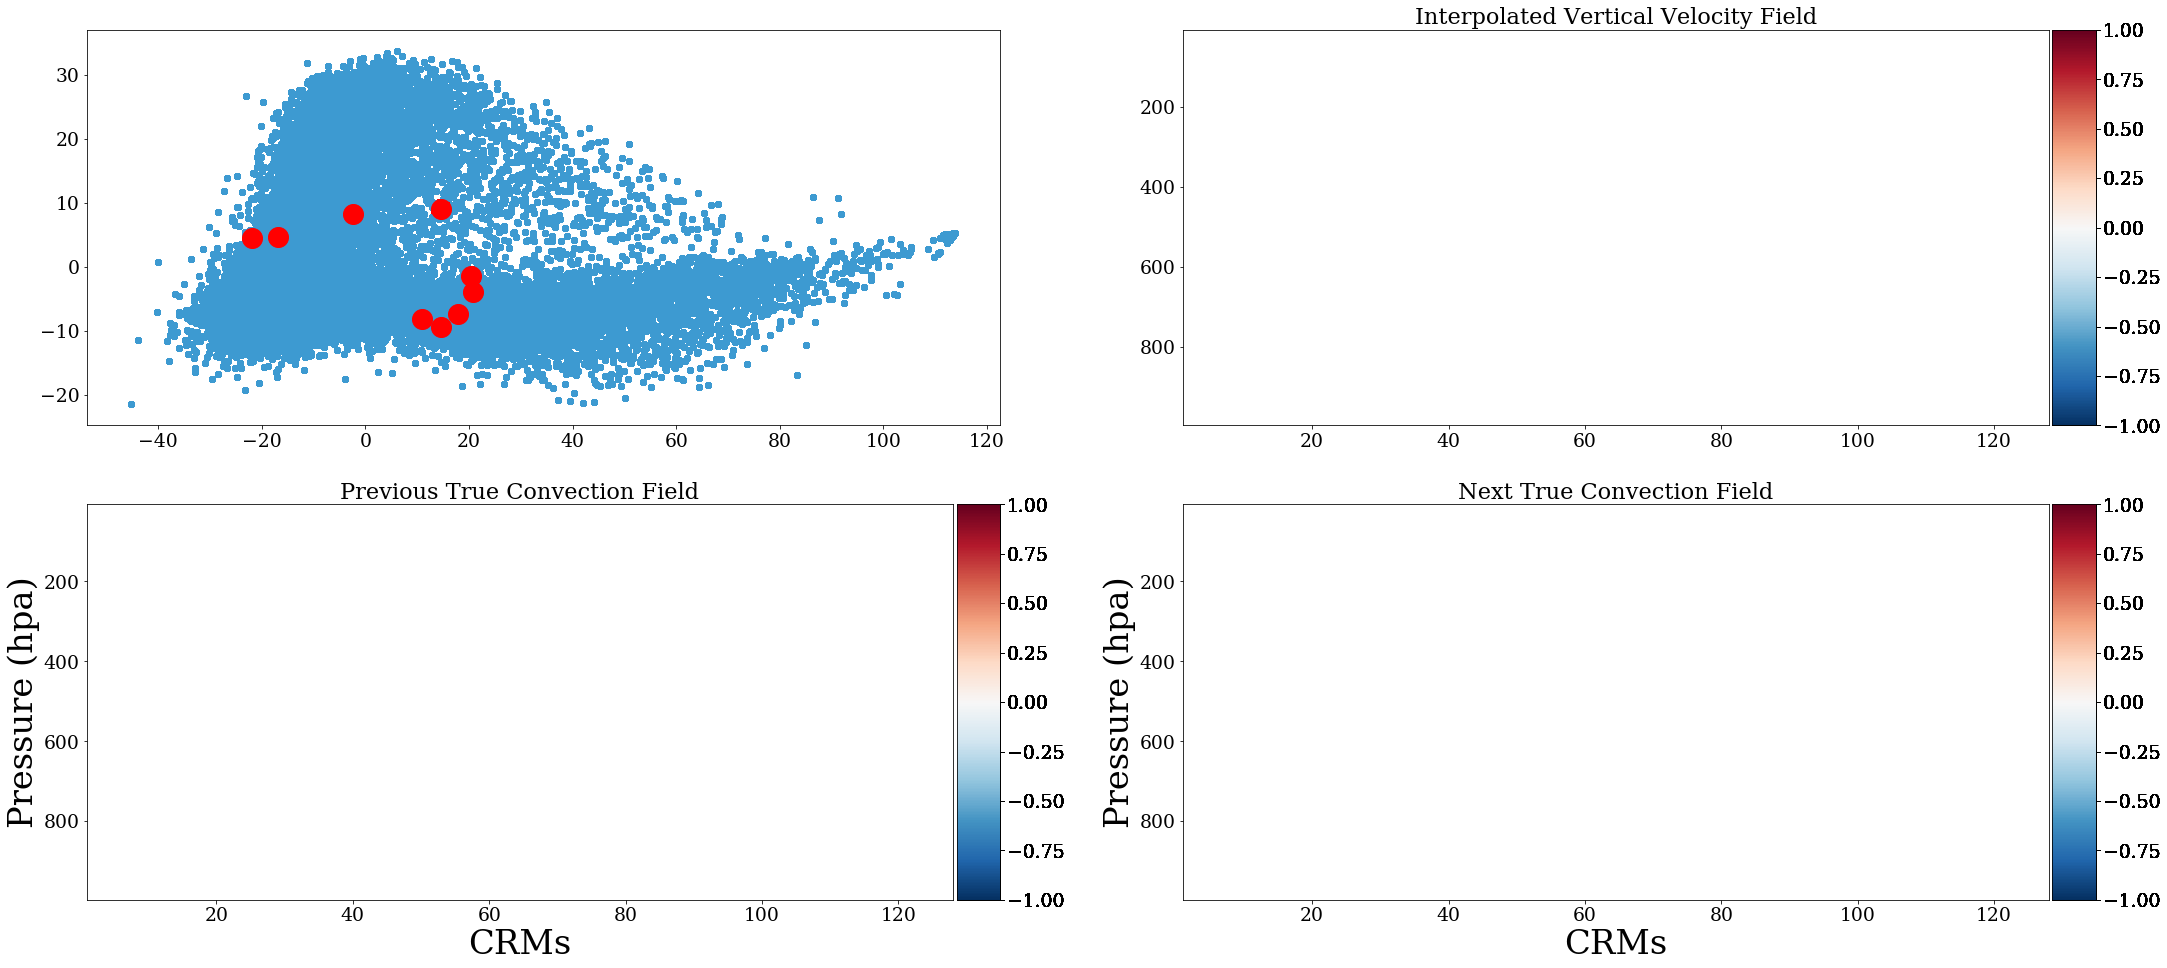

In [36]:
# change vx/vy to location on sorted images
def mikes_horz_latent_animation(latent_space, X, Z, o_images, latents, h_coords):
    colors = cm.hsv(np.linspace(0, 1, int(len(Day_4_latent_space)/4)))
    bc_labels = ["0","1","2","3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]

    fig, ax = plt.subplots(2,2, figsize=(36,16))
    feat_list = []
    #the real total you need
    o_images = o_images.reshape(len(o_images),30,128)
    latents = latents.reshape(len(latents),30,128)
    num_steps = len(latents)
    #num_steps = 20
    cmap= "RdBu_r"
    dummy_orginal = np.zeros(shape=(30,128))
    dummy_orginal[:,:] = np.nan
    dummy_recon = np.zeros(shape=(30,128))
    dummy_recon[:,:] = np.nan
    dummy_latent = np.zeros(shape=(30,128))
    dummy_recon[:,:] = np.nan
    
    count = 29
    true_counter = -1
    one_5_counter = 0
    for i in range(num_steps):
        if i%15 == 0:
            true_counter = true_counter+1
        
        for j in range(len(dummy_orginal)):
            dummy_orginal[count,:] = o_images[true_counter,j,:]
            dummy_recon[count,:] = o_images[true_counter+1,j,:]
            dummy_latent[count,:] = latents[i,j,:]
            count = count-1
        
        h_rect = patches.Circle((h_coords[true_counter, 0]*(1.-one_5_counter/15.0)+h_coords[true_counter+1, 0]*(one_5_counter/15.0),h_coords[true_counter, 1]*(1.0-one_5_counter/15.0)+h_coords[true_counter+1, 1]*(one_5_counter/15.0)),1.0,linewidth=4,edgecolor='black',facecolor='black')

        y_ticks = np.array([1000, 800, 600, 400, 200])
        ax[0,0].scatter(latent_space[:, 0], latent_space[:, 1], c="#3D9AD1",  animated=True)
        
        cb = ax[0,0].scatter(x=h_coords[:, 0], y=h_coords[:, 1], c="Red", s=400, animated=True)
        cs0 = ax[0,0].add_patch(h_rect)
        
        cs1  = ax[0,1].pcolor(X, Z, dummy_latent, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        ax[0,1].set_title("Interpolated Vertical Velocity Field")
        ax[0,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[0,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs1, cax=cax)
        
        cs2  = ax[1,0].pcolor(X, Z, dummy_orginal, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        ax[1,0].set_title("Previous True Convection Field")
        ax[1,0].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,0].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,0].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,0])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs2, cax=cax)
        
        cs3 = ax[1,1].pcolor(X, Z, dummy_recon, cmap=cmap, animated=True, vmin = -1.0, vmax = 1.0)
        ax[1,1].set_title("Next True Convection Field")
        ax[1,1].set_xlabel("CRMs", fontsize=fz*1.5)
        ax[1,1].set_ylabel("Pressure (hpa)", fontsize=fz*1.5)
        ax[1,1].set_yticklabels(y_ticks)
        divider = make_axes_locatable(ax[1,1])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        fig.colorbar(cs3, cax=cax)
        
        feat_list.append([cs2, cs3, cs1, cs0])
        
        count = 29 
        count_latent=7
        one_5_counter = one_5_counter+1
        if one_5_counter >= 15:
            one_5_counter = 0
            
    ani = animation.ArtistAnimation(fig, feat_list, interval = 125, blit = False, repeat = True)
    ani.save('/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/Animations/Figures/Movies/Averaged_Convection_Path_Tracker.mp4')
    plt.show()
        
    
mikes_horz_latent_animation(z_test_tsne, Xs, Zs, average_test_images, average_interpolations, average_z_space)